# Introduction

## Project Overview

Topic 

This project will explore and predict global health trends over time.  

Business Problem

“Global Health has become one of the most important areas of foreign, development and security policy in the past 15 years” (Holst, 2020). It stands to reason that as medical care evolves, the overall health of the world should improve. But is this the case and if so, how can these changes be predicted? Are there telling correlations between certain health indicators? This project will explore these trends over time and correlations before ultimately predicting values over time.



## Data Information

Three datasets were included in the download. The datasets were sourced from the World Bank Open Data portal by the user and published to Kaggle. This source is open to the public. The version of the data published to Kaggle was last updated on 12/26/2024 as noted on the datasets themselves. 

The largest file includes indicators of global health trends, sorted by year and country. The second dataset indicates each country’s geographic location as well as what income category it belongs to. Additionally, there are notes outlining ways data has been adjusted for specific countries. The third dataset gives information about how the measurements for each of the indicators were collected. 

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Checks versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 2.2.3
numpy version: 1.23.5


### Loading the Data

In [3]:
# Reads in the documents
overview = pd.read_csv("API_8_DS2_en_csv_v2_3654.csv")
income_indicator = pd.read_csv("Metadata_Country_API_8_DS2_en_csv_v2_3654.csv")

In [4]:
display(overview.head(5))
display(income_indicator.head(5))

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


## Merging Datasets

The metadata dataset contains information on region, income group and table name. These fields may prove useful in determining where missing values are located and how to handle them. 
Some of the country codes do not represent actual countries, but rather groupings of countries in a region. The metadata will be added to the dataframe to help determine patterns in missing values and potential imputation methods. Where 'Region' is blank due to the country code representing a grouping of countries, the value given in the 'TableName' column will be used instead.

In [5]:
# Count the number of NaN values in the 'Region' column
nan_count_region = income_indicator['Region'].isna().sum()

# Display the result
print(f"Number of NaN values in 'Region' column: {nan_count_region}")

Number of NaN values in 'Region' column: 48


In [6]:
# Fill NaN values in the 'Region' column with values from 'TableName' column
income_indicator['Region'] = income_indicator['Region'].fillna(income_indicator['TableName'])

# Display the updated DataFrame
display(income_indicator)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,Africa Eastern and Southern,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,Africa Western and Central,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [7]:
# Count the number of NaN values in the 'Region' column
nan_count_region = income_indicator['Region'].isna().sum()

# Display the result
print(f"Number of NaN values in 'Region' column: {nan_count_region}")

Number of NaN values in 'Region' column: 0


### Merging the Dataframes

In [8]:
# Merge the dataframes
merged_df = overview.merge(
    income_indicator[['Country Code', 'Region', 'IncomeGroup']],  # Columns to merge from income_indicator
    on='Country Code',  # Column to join on
    how='left'  # 'left' join to keep all rows from overview_dropped
)

In [9]:
display(merged_df.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,Region,IncomeGroup
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income


## Data Dictionary

The columns below give a description of each feature along with the corresponding code. It may prove easier to utilize the code throughout the project so it is important to understand what each metric means specifically.

In [10]:
# Creates a dictionary without duplicates
data_dictionary = merged_df[["Indicator Name", "Indicator Code"]].drop_duplicates()

In [11]:
# Applies CSS for text wrapping
def style_text_wrap(df):
    return df.style.set_properties(**{'white-space': 'pre-wrap'})

In [12]:
# Displays the styled DataFrame
display(style_text_wrap(data_dictionary))

,Indicator Name,Indicator Code
0,Unmet need for contraception (% of married women ages 15-49),SP.UWT.TFRT
1,Completeness of death registration with cause-of-death information (%),SP.REG.DTHS.ZS
2,Completeness of birth registration (%),SP.REG.BRTH.ZS
3,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS
4,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS
5,"Completeness of birth registration, male (%)",SP.REG.BRTH.MA.ZS
6,"Completeness of birth registration, female (%)",SP.REG.BRTH.FE.ZS
7,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS
8,"Population, male",SP.POP.TOTL.MA.IN
9,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS


# EDA

## Overview

In [13]:
rows, columns = merged_df.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 67564
Number of columns: 70


In [14]:
# Number of missing (NaN) values in the dataset
missing_values = merged_df.isna().sum().sum()

# Number of duplicate rows in the dataset
duplicate_rows = merged_df.duplicated().sum()

print(f"Missing cells: {missing_values}")
print(f"Duplicate rows: {duplicate_rows}")

Missing cells: 2477171
Duplicate rows: 0


In [15]:
# Summary of variable types
variable_types = merged_df.dtypes

# Frequency of variable types
variable_type_counts = merged_df.dtypes.value_counts()

# Breakdown of variable types (count and proportion)
type_counts = variable_type_counts.reset_index()
type_counts.columns = ['Variable Type', 'Count']
type_counts['Proportion'] = type_counts['Count'] / len(overview)

# Print the results
print("Summary of variable types:")
print(variable_types)

print("\nFrequency of variable types:")
print(type_counts)

Summary of variable types:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2021              float64
2022              float64
2023              float64
Region             object
IncomeGroup        object
Length: 70, dtype: object

Frequency of variable types:
  Variable Type  Count  Proportion
0       float64     64    0.000947
1        object      6    0.000089


In [16]:
# Count of unique country codes
unique_country_codes = merged_df['Country Code'].nunique()

# Count of unique indicator codes
unique_indicator_codes = merged_df['Indicator Code'].nunique()

# Count of unique regions
unique_regions = merged_df['Region'].nunique()

# Count of unique income groups
unique_income_groups = merged_df['IncomeGroup'].nunique()

# Print the results
print(f"Unique Country Codes: {unique_country_codes}")
print(f"Unique Indicator Codes: {unique_indicator_codes}")
print(f"Unique Regions: {unique_regions}")
print(f"Unique Income Groups: {unique_income_groups}")

Unique Country Codes: 266
Unique Indicator Codes: 254
Unique Regions: 48
Unique Income Groups: 4


To make data manipulation easier, the dataset will be melted where Country Code, Year, Indicator Code and Value are columns. Indicator codes will be used in place of the Indicator Names for simplicity. Country Name will also be dropped and Country Code used instead.

## Structuring the Dataframe

### Melting the Dataframe

In [17]:
# Dynamically select the columns for years
year_columns = [col for col in merged_df.columns if col.isdigit()]

# Dynamically identify unique values in 'Country Code' and 'Indicator Code'
id_vars = ['Country Code', 'Indicator Code', 'Region', 'IncomeGroup']

# Melt the dataframe, keeping 'Country Code' and 'Indicator Code' as id_vars
overview_melted = pd.melt(merged_df, 
                    id_vars=id_vars,  # Dynamically select the id_vars
                    value_vars=year_columns,  # Automatically select year columns
                    var_name='Year', 
                    value_name='Value')

# Display the melted dataframe
display(overview_melted.head())

,Country Code,Indicator Code,Region,IncomeGroup,Year,Value
0,ABW,SP.UWT.TFRT,Latin America & Caribbean,High income,1960,NaN
1,ABW,SP.REG.DTHS.ZS,Latin America & Caribbean,High income,1960,NaN
2,ABW,SP.REG.BRTH.ZS,Latin America & Caribbean,High income,1960,NaN
3,ABW,SP.REG.BRTH.UR.ZS,Latin America & Caribbean,High income,1960,NaN
4,ABW,SP.REG.BRTH.RU.ZS,Latin America & Caribbean,High income,1960,NaN


In [18]:
rows, columns = overview_melted.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 4324096
Number of columns: 6


### Pivoting the Dataframe

To make manipulation of individual indicator codes easier, the dataframe will now be pivoted to a wide format where each indicator code will become its own column. The 'Year' column will also move to become the first column.

In [19]:
overview_pivoted = overview_melted.copy()

In [20]:
# Pivot the DataFrame
overview_pivoted = overview_pivoted.pivot(index=["Country Code", "Year", "Region", "IncomeGroup"], columns="Indicator Code", values="Value").reset_index()

# Flatten the MultiIndex column names
overview_pivoted.columns = [col if isinstance(col, str) else col[1] for col in overview_pivoted.columns]

# Reorder columns to have 'Year' first
cols = ["Year", "Country Code"] + [col for col in overview_pivoted.columns if col not in ["Year", "Country Code"]]
overview_pivoted = overview_pivoted[cols]

In [21]:
display(overview_pivoted.head(5))
display(overview_pivoted.tail(5))

,Year,Country Code,Region,IncomeGroup,SG.VAW.1549.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REAS.ZS,...,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.REG.BRTH.FE.ZS,SP.REG.BRTH.MA.ZS,SP.REG.BRTH.RU.ZS,SP.REG.BRTH.UR.ZS,SP.REG.BRTH.ZS,SP.REG.DTHS.ZS,SP.UWT.TFRT
0,1960,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,50.848476,26995.0,49.151524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,50.833948,27326.0,49.166052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,50.830966,27692.0,49.169034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,50.830687,28027.0,49.169313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,50.825249,28334.0,49.174751,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Year,Country Code,Region,IncomeGroup,SG.VAW.1549.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REAS.ZS,...,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.REG.BRTH.FE.ZS,SP.REG.BRTH.MA.ZS,SP.REG.BRTH.RU.ZS,SP.REG.BRTH.UR.ZS,SP.REG.BRTH.ZS,SP.REG.DTHS.ZS,SP.UWT.TFRT
17019,2019,ZWE,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,...,52.568480,7243442.0,47.431520,48.9,48.4,40.3,68.7,48.7,NaN,NaN
17020,2020,ZWE,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,...,52.530169,7370588.0,47.469831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17021,2021,ZWE,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,...,52.488560,7505482.0,47.511440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17022,2022,ZWE,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,...,52.438295,7642717.0,47.561705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17023,2023,ZWE,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,...,52.383460,7780934.0,47.616540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
rows, columns = overview_pivoted.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 17024
Number of columns: 258


## Missing Values

### Missing Indicator Values

Missing values will first be reviewed by indicator to determine if there are any indicators that do not provide enough information to be useful.

In [23]:
# Exclude 'Year' and 'Country Code' from missing value calculations
missing_percentage = overview_pivoted.drop(columns=["Year", "Country Code", "Region", "IncomeGroup"]).isnull().mean() * 100

# Convert to a DataFrame for better readability
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ["Indicator Code", "Missing Percentage"]

# Display the results sorted by missing percentage (descending)
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns (if needed)
pd.set_option("display.width", 1000)  # Expand output width
pd.set_option("display.colheader_justify", "left")  # Left-align column headers

missing_percentage_df = missing_percentage_df.sort_values(by="Missing Percentage", ascending=False)

In [24]:
display(missing_percentage_df)

,Indicator Code,Missing Percentage
82,SH.STA.FGMS.ZS,99.465461
0,SG.VAW.1549.ZS,99.377350
14,SH.CON.1524.MA.ZS,99.154135
13,SH.CON.1524.FE.ZS,98.983788
69,SH.SGR.PROC.P5,98.936795
2,SG.VAW.BURN.ZS,98.913299
6,SG.VAW.REFU.ZS,98.913299
1,SG.VAW.ARGU.ZS,98.901551
3,SG.VAW.GOES.ZS,98.895677
4,SG.VAW.NEGL.ZS,98.883929


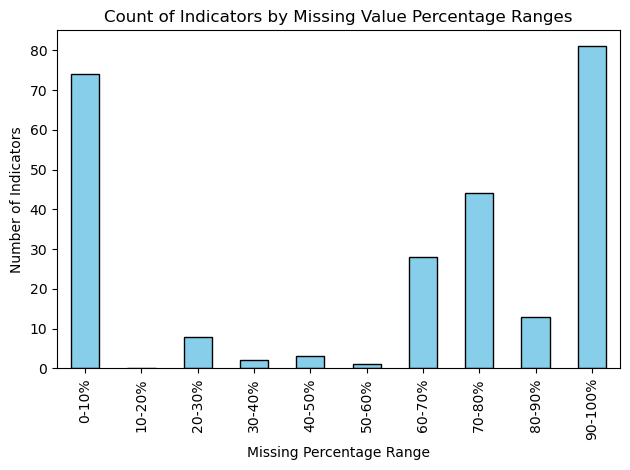

In [25]:
# Create categories for missing percentages
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
missing_percentage_df['Range'] = pd.cut(missing_percentage_df['Missing Percentage'], bins=bins, labels=labels)

# Plot a bar chart of missing value ranges
missing_percentage_df['Range'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Indicators by Missing Value Percentage Ranges')
plt.xlabel('Missing Percentage Range')
plt.ylabel('Number of Indicators')

# Adjust layout to prevent cutoff
plt.tight_layout()

# Save the plot to the current directory
plt.savefig('missing_percentage_barchart.png')

# Show the plot
plt.show()

This bar chart shows that there are approximately 180 indicators that are missing 50% or more of their values. There are approximately 75 indicators that are missing 10% or fewer values. 

For the purposes of this project and the sake of dimesionality reduction, only those indicators that fall into the first bucket will be retained.It is possible that data for these codes is primarily missing from certain countries or across certain years and there may still be valuable information to be gleaned.

### Dropping Indicators

In [26]:
overview_dropped = overview_pivoted.copy()

In [27]:
# Identify indicators with more than 10% missing values
indicators_to_drop = missing_percentage_df.loc[missing_percentage_df["Missing Percentage"] > 10, "Indicator Code"]

# Drop these columns from the main DataFrame
overview_dropped = overview_dropped.drop(columns=indicators_to_drop)

# Confirm changes
print(f"Dropped {len(indicators_to_drop)} indicators with more than 10% missing values.")

# Count the number of remaining indicators (excluding 'Year' and 'Country Code')
remaining_indicators = overview_dropped.shape[1] - 2  # Subtracting 2 for 'Year' and 'Country Code'
print(f"Retained {remaining_indicators} indicators.")

Dropped 180 indicators with more than 10% missing values.
Retained 76 indicators.


In [28]:
display(overview_dropped.head())

,Year,Country Code,Region,IncomeGroup,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
0,1960,ABW,Latin America & Caribbean,High income,-788.0,44.732,162.457,304.947,33.883,6.594,67.783,64.152,60.582,4.820,71.586379,56.025307,14.572181,15.632235,11569.0,41.424812,11780.0,43.636902,23349.0,42.512108,14.282133,15.234020,12.570498,12.770647,9.969026,9.951659,15424.0,55.230695,14581.0,54.012706,30005.0,54.632024,7.974505,8.110611,7.451704,6.602952,6.142911,5.699098,5.072243,5.124928,4.853813,4.778574,4.835909,4.841548,4.193150,4.421107,2.855711,2.804171,1.881725,1.678057,1.357134,1.044619,934.0,3.344494,634.0,2.350392,1569.0,2.855868,0.922063,0.638995,0.605160,0.396362,0.460136,0.270415,1.043,83.046159,5.229128,77.817030,NaN,54922.0,27927.0,50.848476,26995.0,49.151524
1,1961,ABW,Latin America & Caribbean,High income,-566.0,45.826,158.339,301.932,32.831,6.456,68.269,64.537,60.880,4.655,71.399871,56.413673,14.308215,15.346471,11587.0,41.013344,11853.0,43.377065,23440.0,42.175482,14.049835,14.987832,12.655293,13.042762,10.248469,10.085817,15714.0,55.622412,14828.0,54.262502,30542.0,54.953804,7.997381,8.202961,7.418681,6.638488,6.282519,5.765677,5.031324,5.059377,4.670300,4.616567,4.757017,4.678780,4.254415,4.451886,3.010300,2.977073,1.952005,1.785878,1.403391,1.081407,950.0,3.364245,645.0,2.360433,1595.0,2.870714,0.927335,0.647747,0.615864,0.397065,0.417655,0.234213,1.043,81.969092,5.222317,76.746775,1.187344,55578.0,28252.0,50.833948,27326.0,49.166052
2,1962,ABW,Latin America & Caribbean,High income,-601.0,46.716,156.430,301.822,31.649,6.394,68.579,64.752,61.023,4.471,72.284240,56.819692,13.994795,15.002799,11624.0,40.604642,11955.0,43.172093,23579.0,41.867010,13.821891,14.759042,12.787956,13.410252,10.454617,10.207103,16032.0,56.000140,15074.0,54.435477,31106.0,55.230824,8.047924,8.177600,7.356306,6.713251,6.435894,5.830309,5.040432,5.025008,4.539183,4.530271,4.678904,4.526660,4.259741,4.378600,3.161186,3.154398,2.025953,1.892277,1.446111,1.124894,972.0,3.395218,663.0,2.392431,1635.0,2.902166,0.937877,0.666269,0.621758,0.393623,0.389472,0.207645,1.043,81.058317,5.256221,75.802096,1.326227,56320.0,28628.0,50.830966,27692.0,49.169034
3,1963,ABW,Latin America & Caribbean,High income,-650.0,47.440,152.758,297.246,30.416,6.275,68.992,65.132,61.372,4.271,73.059731,57.180839,13.701940,14.682009,11624.0,40.117001,11993.0,42.791901,23617.0,41.432243,13.556982,14.483989,12.858080,13.625903,10.645751,10.395148,16357.0,56.450611,15347.0,54.758719,31704.0,55.618712,8.178022,8.184818,7.265134,6.829007,6.576586,5.894211,5.116656,5.012934,4.467799,4.509856,4.550632,4.351084,4.221026,4.242262,3.311590,3.343145,2.117416,1.996254,1.473735,1.173847,995.0,3.432388,686.0,2.449380,1681.0,2.949045,0.959481,0.693961,0.624698,0.390688,0.374474,0.190884,1.043,79.79

In [29]:
rows, columns = overview_dropped.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 17024
Number of columns: 78


### Missing Values by Region

Next, missing values will be evaluated based on regions.

In [30]:
# Calculate the percentage of missing values by row (excluding 'Year' and 'Region')
missing_percentage_by_region = overview_dropped.drop(columns=["Year", "Region"]).isnull().mean(axis=1) * 100

# Group by 'Region' and calculate the average missing percentage for each region
missing_by_region_percentage = (
    pd.DataFrame({"Region": overview_dropped["Region"], "Missing Percentage": missing_percentage_by_region})
    .groupby("Region")["Missing Percentage"]
    .mean()
)

# Sort by missing percentage (largest to smallest)
missing_by_region_percentage_sorted = missing_by_region_percentage.sort_values(ascending=False)

# Display the sorted missing percentages by region
print("Percentage of Missing Values by Region (sorted):")
display(missing_by_region_percentage_sorted)

Percentage of Missing Values by Region (sorted):


Region
Europe & Central Asia (IDA & IBRD)                    1.747533
Central Europe and the Baltics                        1.706414
Euro area                                             1.665296
European Union                                        1.665296
OECD members                                          1.624178
Post-demographic dividend                             1.624178
High income                                           1.624178
Africa Eastern and Southern                           1.583059
Low & middle income                                   1.583059
Low income                                            1.583059
Lower middle income                                   1.583059
Middle East & North Africa (IDA & IBRD)               1.583059
Middle East & North Africa (excluding high income)    1.583059
Middle income                                         1.583059
Pacific island small states                           1.583059
Other small states                              

No regions stand out specifically as having more missing values than others. It is interesting, however, that there are multiple regions that have the exact same percentage of missing values.

This is also showing that there are several regions that seem to be grouped by values such as income as opposed to representing geographical locations.

In [31]:
# Step 1: Get all unique regions
unique_regions = overview_dropped["Region"].dropna().unique()

# Step 2: Create a dictionary mapping each region to its unique country codes and names
region_country_map = {}

for region in unique_regions:
    # Get unique country codes for the region
    country_codes = overview_dropped.loc[overview_dropped["Region"] == region, "Country Code"].unique()
    
    # Get unique country names for those country codes
    country_names = (
        overview.loc[overview["Country Code"].isin(country_codes), ["Country Code", "Country Name"]]
        .drop_duplicates(subset="Country Code")
    )
    
    # Store the result in the dictionary
    region_country_map[region] = country_names

# Display results with country count at the top
for region, countries in region_country_map.items():
    country_count = countries.shape[0]  # Get the number of countries in the region
    print(f"Region: {region} - Number of Countries: {country_count}")
    display(countries)  # Display in a readable format
    print("\n" + "="*50 + "\n")  # Separator for readability

Region: Latin America & Caribbean - Number of Countries: 43


,Country Code,Country Name
0,ABW,Aruba
2286,ARG,Argentina
3048,ATG,Antigua and Barbuda
5842,BHS,"Bahamas, The"
6604,BLZ,Belize
7112,BOL,Bolivia
7366,BRA,Brazil
7620,BRB,Barbados
9906,CHL,Chile
11430,COL,Colombia




Region: Africa Eastern and Southern - Number of Countries: 1


,Country Code,Country Name
254,AFE,Africa Eastern and Southern




Region: South Asia - Number of Countries: 9


,Country Code,Country Name
508,AFG,Afghanistan
5080,BGD,Bangladesh
8128,BTN,Bhutan
27686,IND,India
35052,LKA,Sri Lanka
38608,MDV,Maldives
45212,NPL,Nepal
46736,PAK,Pakistan
51816,SAS,South Asia




Region: Africa Western and Central - Number of Countries: 1


,Country Code,Country Name
762,AFW,Africa Western and Central




Region: Sub-Saharan Africa - Number of Countries: 49


,Country Code,Country Name
1016,AGO,Angola
4064,BDI,Burundi
4572,BEN,Benin
4826,BFA,Burkina Faso
8382,BWA,Botswana
8636,CAF,Central African Republic
10414,CIV,Cote d'Ivoire
10668,CMR,Cameroon
10922,COD,"Congo, Dem. Rep."
11176,COG,"Congo, Rep."




Region: Europe & Central Asia - Number of Countries: 59


,Country Code,Country Name
1270,ALB,Albania
1524,AND,Andorra
2540,ARM,Armenia
3556,AUT,Austria
3810,AZE,Azerbaijan
4318,BEL,Belgium
5334,BGR,Bulgaria
6096,BIH,Bosnia and Herzegovina
6350,BLR,Belarus
9398,CHE,Switzerland




Region: Arab World - Number of Countries: 1


,Country Code,Country Name
1778,ARB,Arab World




Region: Middle East & North Africa - Number of Countries: 22


,Country Code,Country Name
2032,ARE,United Arab Emirates
5588,BHR,Bahrain
14224,DJI,Djibouti
15240,DZA,Algeria
17018,EGY,"Egypt, Arab Rep."
28448,IRN,"Iran, Islamic Rep."
28702,IRQ,Iraq
29210,ISR,Israel
29972,JOR,Jordan
32258,KWT,Kuwait




Region: East Asia & Pacific - Number of Countries: 38


,Country Code,Country Name
2794,ASM,American Samoa
3302,AUS,Australia
7874,BRN,Brunei Darussalam
10160,CHN,China
16002,EAS,East Asia & Pacific
19304,FJI,Fiji
20066,FSM,"Micronesia, Fed. Sts."
23622,GUM,Guam
24384,HKG,"Hong Kong SAR, China"
26924,IDN,Indonesia




Region: North America - Number of Countries: 4


,Country Code,Country Name
6858,BMU,Bermuda
8890,CAN,Canada
43180,NAC,North America
63754,USA,United States




Region: Central Europe and the Baltics - Number of Countries: 1


,Country Code,Country Name
9144,CEB,Central Europe and the Baltics




Region: Caribbean small states - Number of Countries: 1


,Country Code,Country Name
12446,CSS,Caribbean small states




Region: East Asia & Pacific (excluding high income) - Number of Countries: 1


,Country Code,Country Name
15494,EAP,East Asia & Pacific (excluding high income)




Region: Early-demographic dividend - Number of Countries: 1


,Country Code,Country Name
15748,EAR,Early-demographic dividend




Region: Europe & Central Asia (excluding high income) - Number of Countries: 1


,Country Code,Country Name
16256,ECA,Europe & Central Asia (excluding high income)




Region: Euro area - Number of Countries: 1


,Country Code,Country Name
17272,EMU,Euro area




Region: European Union - Number of Countries: 1


,Country Code,Country Name
18542,EUU,European Union




Region: Fragile and conflict affected situations - Number of Countries: 1


,Country Code,Country Name
18796,FCS,Fragile and conflict affected situations




Region: High income - Number of Countries: 1


,Country Code,Country Name
24130,HIC,High income




Region: Heavily indebted poor countries (HIPC) - Number of Countries: 1


,Country Code,Country Name
24892,HPC,Heavily indebted poor countries (HIPC)




Region: IBRD only - Number of Countries: 1


,Country Code,Country Name
25908,IBD,IBRD only




Region: IDA & IBRD total - Number of Countries: 1


,Country Code,Country Name
26162,IBT,IDA & IBRD total




Region: IDA total - Number of Countries: 1


,Country Code,Country Name
26416,IDA,IDA total




Region: IDA blend - Number of Countries: 1


,Country Code,Country Name
26670,IDB,IDA blend




Region: IDA only - Number of Countries: 1


,Country Code,Country Name
27178,IDX,IDA only




Region: Latin America & Caribbean (excluding high income) - Number of Countries: 1


,Country Code,Country Name
32512,LAC,Latin America & Caribbean (excluding high income)




Region: Least developed countries: UN classification - Number of Countries: 1


,Country Code,Country Name
34290,LDC,Least developed countries: UN classification




Region: Low income - Number of Countries: 1


,Country Code,Country Name
34544,LIC,Low income




Region: Lower middle income - Number of Countries: 1


,Country Code,Country Name
35306,LMC,Lower middle income




Region: Low & middle income - Number of Countries: 1


,Country Code,Country Name
35560,LMY,Low & middle income




Region: Late-demographic dividend - Number of Countries: 1


,Country Code,Country Name
36068,LTE,Late-demographic dividend




Region: Middle income - Number of Countries: 1


,Country Code,Country Name
39624,MIC,Middle income




Region: Middle East & North Africa (excluding high income) - Number of Countries: 1


,Country Code,Country Name
40894,MNA,Middle East & North Africa (excluding high inc...




Region: OECD members - Number of Countries: 1


,Country Code,Country Name
45974,OED,OECD members




Region: Other small states - Number of Countries: 1


,Country Code,Country Name
46482,OSS,Other small states




Region: Pre-demographic dividend - Number of Countries: 1


,Country Code,Country Name
48514,PRE,Pre-demographic dividend




Region: Pacific island small states - Number of Countries: 1


,Country Code,Country Name
50038,PSS,Pacific island small states




Region: Post-demographic dividend - Number of Countries: 1


,Country Code,Country Name
50292,PST,Post-demographic dividend




Region: Sub-Saharan Africa (excluding high income) - Number of Countries: 1


,Country Code,Country Name
54610,SSA,Sub-Saharan Africa (excluding high income)




Region: Small states - Number of Countries: 1


,Country Code,Country Name
55372,SST,Small states




Region: East Asia & Pacific (IDA & IBRD) - Number of Countries: 1


,Country Code,Country Name
58420,TEA,East Asia & Pacific (IDA & IBRD countries)




Region: Europe & Central Asia (IDA & IBRD) - Number of Countries: 1


,Country Code,Country Name
58674,TEC,Europe & Central Asia (IDA & IBRD countries)




Region: Latin America & Caribbean (IDA & IBRD) - Number of Countries: 1


,Country Code,Country Name
59944,TLA,Latin America & the Caribbean (IDA & IBRD coun...




Region: Middle East & North Africa (IDA & IBRD) - Number of Countries: 1


,Country Code,Country Name
60452,TMN,Middle East & North Africa (IDA & IBRD countries)




Region: South Asia (IDA & IBRD) - Number of Countries: 1


,Country Code,Country Name
60960,TSA,South Asia (IDA & IBRD)




Region: Sub-Saharan Africa (IDA & IBRD) - Number of Countries: 1


,Country Code,Country Name
61214,TSS,Sub-Saharan Africa (IDA & IBRD countries)




Region: Upper middle income - Number of Countries: 1


,Country Code,Country Name
63246,UMC,Upper middle income




Region: World - Number of Countries: 1


,Country Code,Country Name
65786,WLD,World


The methods used to determine regions is interesting. There is likely some overlap as each country code does not necessarily represent an actual country. Regional inclusion does not equate to cultural similarities as New Zeeland is in the same regional category as China.

In [32]:
# List of regions with the same missing percentage
regions_with_same_missing = [
    "Africa Eastern and Southern", "Low & middle income", "Low income", "Lower middle income",
    "Middle East & North Africa (IDA & IBRD)", "Middle East & North Africa (excluding high income)",
    "Middle income", "Pacific island small states", "Other small states", 
    "Latin America & Caribbean (excluding high income)", "Pre-demographic dividend", 
    "Small states", "South Asia (IDA & IBRD)", "Sub-Saharan Africa (IDA & IBRD)", 
    "Sub-Saharan Africa (excluding high income)", "Upper middle income", 
    "Least developed countries: UN classification", "Latin America & Caribbean (IDA & IBRD)",
    "Africa Western and Central", "Heavily indebted poor countries (HIPC)", "Arab World", 
    "Caribbean small states", "Early-demographic dividend", "East Asia & Pacific (IDA & IBRD)", 
    "East Asia & Pacific (excluding high income)", "Europe & Central Asia (excluding high income)", 
    "Fragile and conflict affected situations", "IBRD only", "IDA & IBRD total", 
    "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", "World"
]

# Filter the overview dataframe by these regions
regions_missing_data = overview_dropped[overview_dropped["Region"].isin(regions_with_same_missing)]

# Identify columns that correspond to indicators (excluding non-indicator columns like 'Region', 'Country Code', etc.)
indicator_columns = [col for col in regions_missing_data.columns if col not in ["Region", "Country Code", "Year"]]

# Check for missing data in the indicator columns
missing_data = regions_missing_data[indicator_columns].isnull()

# Identify the indicator and year combinations with missing data
missing_by_indicator_year = missing_data.groupby(regions_missing_data["Year"]).sum()

# Display the result
print("Number of Regions: ", len(regions_with_same_missing))
print("Missing Data by Indicator and Year:")
display(missing_by_indicator_year)

Number of Regions:  34
Missing Data by Indicator and Year:


,IncomeGroup,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0
1961,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1962,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1963,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1964,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1965,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1966,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1967,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1968,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


All of these regions are missing values in the Income Group column. 

In [33]:
# Drop the 'IncomeGroup' column from the dataframe if it exists
regions_missing_data = regions_missing_data.drop(columns=["IncomeGroup"], errors='ignore')

# Identify columns that correspond to indicators (excluding non-indicator columns like 'Region', 'Country Code', etc.)
indicator_columns = [col for col in regions_missing_data.columns if col not in ["Region", "Country Code", "Year"]]

# Check for missing data in the indicator columns
missing_data = regions_missing_data[indicator_columns].isnull()

# Sum the missing data across all years for each indicator
missing_by_indicator = missing_data.sum()

# Filter out indicators with no missing data (where sum is zero)
indicators_with_missing = missing_by_indicator[missing_by_indicator > 0].index

# Now, filter the original dataframe to only include these indicators
filtered_missing_data = missing_data[indicators_with_missing]

# Group by Year and sum the missing data
missing_by_indicator_year = filtered_missing_data.groupby(regions_missing_data["Year"]).sum()

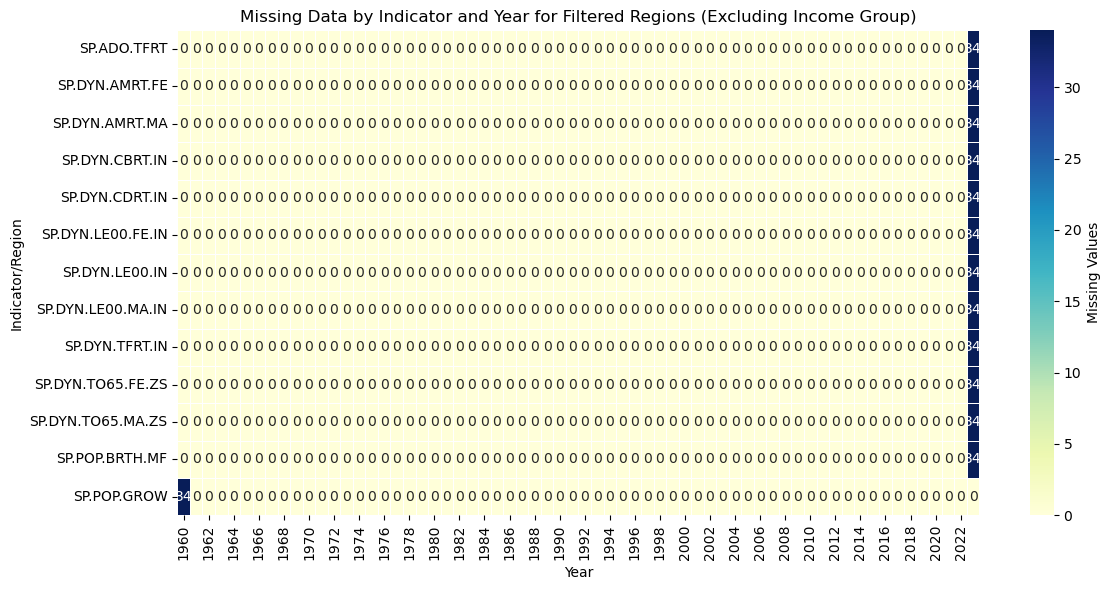

In [34]:
# Prepare the heatmap data (transpose to have years as columns and indicators as rows)
heatmap_data = missing_by_indicator_year.T  # Transpose to switch axes

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Missing Values'}, linewidths=0.5)
plt.title('Missing Data by Indicator and Year for Filtered Regions (Excluding Income Group)')
plt.xlabel('Year')
plt.ylabel('Indicator/Region')

plt.tight_layout()
plt.show()

All 34 regions are missing values from 2023 and one value from indicator SP.POP.GROW in 1960. They are all missing the exact same indicator and year values as one another.

### Missing Values by Year

As indicated when looking at missing values by region, there may be an issue with missing values for the year 2023 for certain indicators. 

In [35]:
# Calculate the percentage of missing values by row (excluding 'Region' and 'Year')
missing_percentage_by_year = overview_dropped.drop(columns=["Region"]).isnull().mean(axis=1) * 100

# Group by 'Year' and calculate the average missing percentage for each year
missing_by_year_percentage = (
    pd.DataFrame({"Year": overview_dropped["Year"], "Missing Percentage": missing_percentage_by_year})
    .groupby("Year")["Missing Percentage"]
    .mean()
)

# Sort by missing percentage (largest to smallest)
missing_by_year_percentage_sorted = missing_by_year_percentage.sort_values(ascending=False)

# Display the sorted missing percentages by year
print("Percentage of Missing Values by Year (sorted):")
display(missing_by_year_percentage_sorted)

Percentage of Missing Values by Year (sorted):


Year
2023    16.131237
1960     2.446050
2022     1.210819
1963     1.181525
1964     1.176643
1965     1.176643
1961     1.166878
1967     1.161996
1968     1.161996
1969     1.161996
1962     1.152231
1966     1.152231
1972     1.132702
1971     1.132702
1970     1.127820
1974     1.127820
1975     1.122937
1973     1.113173
1976     1.113173
1977     1.113173
1979     1.098526
1981     1.093643
1982     1.088761
1978     1.083879
1983     1.074114
1980     1.074114
1984     1.064349
1985     1.064349
2021     1.064349
1986     1.044820
1988     1.044820
1987     1.039938
1989     1.035055
2020     0.976467
2019     0.903232
1991     0.903232
1993     0.898350
1992     0.893467
1998     0.888585
1997     0.888585
1999     0.888585
1996     0.883703
1990     0.883703
1994     0.883703
2018     0.883703
2017     0.878820
2002     0.873938
2003     0.873938
2001     0.873938
2011     0.869056
2013     0.869056
1995     0.864173
2015     0.864173
2016     0.859291
2000     0.854409
2008 

The year 2023 has more than 10% missing values. Imputation could potentially work to fill in these values, but in this project data from this year will be dropped instead.

### Dropping Year 2023

In [36]:
# Count the number of rows where the Year is 2023
count_2023 = overview_dropped[overview_dropped["Year"] == 2023].shape[0]

# Display the count
print(f"Number of rows with Year 2023: {count_2023}")

# Now drop rows where Year is 2023
overview_dropped_no_2023 = overview_dropped[overview_dropped["Year"] != 2023]

Number of rows with Year 2023: 0


In [37]:
# Drop rows where the Year is 2023
overview_dropped_no_2023 = overview_dropped[overview_dropped["Year"] != 2023]

display(overview_dropped_no_2023.head())

,Year,Country Code,Region,IncomeGroup,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
0,1960,ABW,Latin America & Caribbean,High income,-788.0,44.732,162.457,304.947,33.883,6.594,67.783,64.152,60.582,4.820,71.586379,56.025307,14.572181,15.632235,11569.0,41.424812,11780.0,43.636902,23349.0,42.512108,14.282133,15.234020,12.570498,12.770647,9.969026,9.951659,15424.0,55.230695,14581.0,54.012706,30005.0,54.632024,7.974505,8.110611,7.451704,6.602952,6.142911,5.699098,5.072243,5.124928,4.853813,4.778574,4.835909,4.841548,4.193150,4.421107,2.855711,2.804171,1.881725,1.678057,1.357134,1.044619,934.0,3.344494,634.0,2.350392,1569.0,2.855868,0.922063,0.638995,0.605160,0.396362,0.460136,0.270415,1.043,83.046159,5.229128,77.817030,NaN,54922.0,27927.0,50.848476,26995.0,49.151524
1,1961,ABW,Latin America & Caribbean,High income,-566.0,45.826,158.339,301.932,32.831,6.456,68.269,64.537,60.880,4.655,71.399871,56.413673,14.308215,15.346471,11587.0,41.013344,11853.0,43.377065,23440.0,42.175482,14.049835,14.987832,12.655293,13.042762,10.248469,10.085817,15714.0,55.622412,14828.0,54.262502,30542.0,54.953804,7.997381,8.202961,7.418681,6.638488,6.282519,5.765677,5.031324,5.059377,4.670300,4.616567,4.757017,4.678780,4.254415,4.451886,3.010300,2.977073,1.952005,1.785878,1.403391,1.081407,950.0,3.364245,645.0,2.360433,1595.0,2.870714,0.927335,0.647747,0.615864,0.397065,0.417655,0.234213,1.043,81.969092,5.222317,76.746775,1.187344,55578.0,28252.0,50.833948,27326.0,49.166052
2,1962,ABW,Latin America & Caribbean,High income,-601.0,46.716,156.430,301.822,31.649,6.394,68.579,64.752,61.023,4.471,72.284240,56.819692,13.994795,15.002799,11624.0,40.604642,11955.0,43.172093,23579.0,41.867010,13.821891,14.759042,12.787956,13.410252,10.454617,10.207103,16032.0,56.000140,15074.0,54.435477,31106.0,55.230824,8.047924,8.177600,7.356306,6.713251,6.435894,5.830309,5.040432,5.025008,4.539183,4.530271,4.678904,4.526660,4.259741,4.378600,3.161186,3.154398,2.025953,1.892277,1.446111,1.124894,972.0,3.395218,663.0,2.392431,1635.0,2.902166,0.937877,0.666269,0.621758,0.393623,0.389472,0.207645,1.043,81.058317,5.256221,75.802096,1.326227,56320.0,28628.0,50.830966,27692.0,49.169034
3,1963,ABW,Latin America & Caribbean,High income,-650.0,47.440,152.758,297.246,30.416,6.275,68.992,65.132,61.372,4.271,73.059731,57.180839,13.701940,14.682009,11624.0,40.117001,11993.0,42.791901,23617.0,41.432243,13.556982,14.483989,12.858080,13.625903,10.645751,10.395148,16357.0,56.450611,15347.0,54.758719,31704.0,55.618712,8.178022,8.184818,7.265134,6.829007,6.576586,5.894211,5.116656,5.012934,4.467799,4.509856,4.550632,4.351084,4.221026,4.242262,3.311590,3.343145,2.117416,1.996254,1.473735,1.173847,995.0,3.432388,686.0,2.449380,1681.0,2.949045,0.959481,0.693961,0.624698,0.390688,0.374474,0.190884,1.043,79.79

In [38]:
rows, columns = overview_dropped_no_2023.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 17024
Number of columns: 78


### Testing Missing Data for Trends

The data will be tested to determine if the missing values are completely at random or not. This is a step to decide how to handle the remaining missing data as it will help show whether imputation will introduce bias.

In [39]:
from statsmodels.imputation import mice
from statsmodels.stats import weightstats as st
import scipy.stats as st

In [40]:
def little_mcar_test_per_column(data):
    p_values = {}
    
    # Iterate through each column
    for column in data.columns:
        # Create a mask for missing data in the current column
        missing_data_mask = data[column].isnull()
        
        # Reshape the data
        missing_data_flat = missing_data_mask.values
        data_flat = data[column].values
        
        # Create contingency table
        contingency_table = pd.crosstab(missing_data_flat, data_flat)
        
        # Calculate the chi-squared statistic
        chi2_stat, p_value, dof, expected = st.chi2_contingency(contingency_table)
        
        # Store p-value for the current column
        p_values[column] = p_value
    
    return p_values

In [41]:
# Select only numeric columns
numeric_data = overview_dropped_no_2023.select_dtypes(include=[np.number])

In [42]:
# Apply the function to get p-values per column
p_values = little_mcar_test_per_column(overview_dropped_no_2023)
print("P-values for each column:", p_values)

P-values for each column: {'Year': 1.0, 'Country Code': 1.0, 'Region': 1.0, 'IncomeGroup': 1.0, 'SM.POP.NETM': 1.0, 'SP.ADO.TFRT': 1.0, 'SP.DYN.AMRT.FE': 1.0, 'SP.DYN.AMRT.MA': 1.0, 'SP.DYN.CBRT.IN': 1.0, 'SP.DYN.CDRT.IN': 1.0, 'SP.DYN.LE00.FE.IN': 1.0, 'SP.DYN.LE00.IN': 1.0, 'SP.DYN.LE00.MA.IN': 1.0, 'SP.DYN.TFRT.IN': 1.0, 'SP.DYN.TO65.FE.ZS': 1.0, 'SP.DYN.TO65.MA.ZS': 1.0, 'SP.POP.0004.FE.5Y': 1.0, 'SP.POP.0004.MA.5Y': 1.0, 'SP.POP.0014.FE.IN': 1.0, 'SP.POP.0014.FE.ZS': 1.0, 'SP.POP.0014.MA.IN': 1.0, 'SP.POP.0014.MA.ZS': 1.0, 'SP.POP.0014.TO': 1.0, 'SP.POP.0014.TO.ZS': 1.0, 'SP.POP.0509.FE.5Y': 1.0, 'SP.POP.0509.MA.5Y': 1.0, 'SP.POP.1014.FE.5Y': 1.0, 'SP.POP.1014.MA.5Y': 1.0, 'SP.POP.1519.FE.5Y': 1.0, 'SP.POP.1519.MA.5Y': 1.0, 'SP.POP.1564.FE.IN': 1.0, 'SP.POP.1564.FE.ZS': 1.0, 'SP.POP.1564.MA.IN': 1.0, 'SP.POP.1564.MA.ZS': 1.0, 'SP.POP.1564.TO': 1.0, 'SP.POP.1564.TO.ZS': 1.0, 'SP.POP.2024.FE.5Y': 1.0, 'SP.POP.2024.MA.5Y': 1.0, 'SP.POP.2529.FE.5Y': 1.0, 'SP.POP.2529.MA.5Y': 1.0, 'SP.

 A p-value of 1.0 from the MCAR test suggests that the missingess is completely at random. This means there is less chance of introducing bias into the dataset when manipulating missing values.

### Narrowing the Dataset

The dataset is currently very large and would likely take too much computational power to model every region. For this reason, it will be narrowed by Region to only include the World. 

In [43]:
world_df = overview_dropped_no_2023[overview_dropped_no_2023['Region'] == 'World'].copy()

In [44]:
display(world_df.head())

,Year,Country Code,Region,IncomeGroup,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
16576,1960,WLD,World,NaN,0.0,92.139723,301.875903,386.634777,31.864856,17.227560,52.990224,50.914887,49.028404,4.689982,51.368383,41.903646,14.166850,14.794726,553661205.0,36.573559,576359231.0,38.227711,1.130020e+09,37.398957,12.325175,12.862534,10.081534,10.570451,8.322264,8.714424,874298330.0,57.754096,867041485.0,57.507557,1.741340e+09,57.631076,8.022309,8.361228,7.361517,7.594638,6.855755,6.986431,6.115701,6.001247,5.080305,4.975922,4.922005,4.718073,4.375271,4.139991,3.714602,3.416198,2.984366,2.599405,2.269154,1.844262,85869620.0,5.672345,64299373.0,4.264733,150169003.0,4.969967,1.656429,1.255524,1.006678,0.705576,0.740085,0.459370,1.052804,74.480557,8.623762,64.893734,NaN,3.021529e+09,1.513829e+09,50.101423,1.507700e+09,49.898577
16577,1961,WLD,World,NaN,0.0,90.736682,284.049655,366.140461,31.122660,14.569443,54.988259,52.871485,50.944672,4.568920,53.596493,43.876407,13.879847,14.502550,562248337.0,36.643307,585346725.0,38.298322,1.147595e+09,37.469195,12.409424,12.953586,10.354036,10.842185,8.313347,8.701856,884559044.0,57.649204,877795748.0,57.432804,1.762355e+09,57.541216,7.955572,8.293385,7.332214,7.565452,6.827453,6.996010,6.144686,6.048568,5.128409,5.017962,4.837090,4.637011,4.376883,4.126971,3.718981,3.422463,3.014570,2.623127,2.290030,1.854924,87574689.0,5.707489,65244940.0,4.268874,152819627.0,4.989590,1.652508,1.245408,1.017008,0.708630,0.747944,0.459912,1.052599,74.757472,8.671332,65.117141,1.364880,3.062769e+09,1.534382e+09,50.097864,1.528387e+09,49.902136
16578,1962,WLD,World,NaN,0.0,95.043985,264.172684,341.994341,35.074813,13.600995,57.406612,55.239243,53.258956,5.028700,56.915086,46.850518,13.745039,14.364384,573677312.0,36.740937,597330520.0,38.389805,1.171008e+09,37.563930,12.438979,12.988224,10.556919,11.037197,8.408462,8.797655,898075383.0,57.516883,892093297.0,57.333899,1.790169e+09,57.425551,7.838992,8.164217,7.307514,7.550602,6.771509,6.955929,6.148002,6.092626,5.203204,5.076349,4.714805,4.528582,4.362588,4.101412,3.727869,3.425325,3.033939,2.641201,2.308769,1.866596,89659076.0,5.742180,66537512.0,4.276296,156196594.0,5.010520,1.648219,1.235608,1.029274,0.713672,0.755918,0.460421,1.053732,75.167961,8.725245,65.413268,1.782818,3.117373e+09,1.561412e+09,50.087421,1.555961e+09,49.912579
16579,1963,WLD,World,NaN,0.0,97.213031,261.059786,338.199236,36.251294,13.444486,57.751863,55.571979,53.578000,5.317398,57.457964,47.412277,13.849054,14.472516,589370283.0,36.966519,613821915.0,38.611764,1.203192e+09,37.787951,12.396219,12.947120,10.721246,11.192128,8.548852,8.936768,912988630.0,57.264529,907902786.0,57.110584,1.820891e+09,57.187668,7.681326,7.987683,7.259524,7.513634,6.681819,6.869937,6.130799,6.128010,5.274994,5.131659,

In [45]:
rows, columns = world_df.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 64
Number of columns: 78


### Missing Values

In [46]:
# Calculate the number of NaN values per column
nan_count = world_df.isnull().sum()

# Calculate the percentage of missing values per column
nan_percentage = (nan_count / len(world_df)) * 100

# Create a DataFrame to show both counts and percentages of NaN values
nan_summary = pd.DataFrame({
    'NaN Count': nan_count,
    'NaN Percentage': nan_percentage
})

# Display the summary
print(nan_summary)

                   NaN Count  NaN Percentage
Year                0           0.0000      
Country Code        0           0.0000      
Region              0           0.0000      
IncomeGroup        64         100.0000      
SM.POP.NETM         0           0.0000      
SP.ADO.TFRT         1           1.5625      
SP.DYN.AMRT.FE      1           1.5625      
SP.DYN.AMRT.MA      1           1.5625      
SP.DYN.CBRT.IN      1           1.5625      
SP.DYN.CDRT.IN      1           1.5625      
SP.DYN.LE00.FE.IN   1           1.5625      
SP.DYN.LE00.IN      1           1.5625      
SP.DYN.LE00.MA.IN   1           1.5625      
SP.DYN.TFRT.IN      1           1.5625      
SP.DYN.TO65.FE.ZS   1           1.5625      
SP.DYN.TO65.MA.ZS   1           1.5625      
SP.POP.0004.FE.5Y   0           0.0000      
SP.POP.0004.MA.5Y   0           0.0000      
SP.POP.0014.FE.IN   0           0.0000      
SP.POP.0014.FE.ZS   0           0.0000      
SP.POP.0014.MA.IN   0           0.0000      
SP.POP.001

In [47]:
# Calculate the number of NaN values per column (excluding 'IncomeGroup')
nan_count = world_df.drop(columns=['IncomeGroup']).isnull().sum()

# Calculate the percentage of missing values per column (excluding 'IncomeGroup')
nan_percentage = (nan_count / len(world_df)) * 100

# Create a DataFrame to show both counts and percentages of NaN values
nan_summary = pd.DataFrame({
    'NaN Count': nan_count,
    'NaN Percentage': nan_percentage
})

# Display rows where any value is missing (excluding 'IncomeGroup')
missing_data_years = world_df[world_df.drop(columns=['IncomeGroup']).isnull().any(axis=1)][['Year']]

# Display the NaN summary along with missing data years
print("Missing Data Summary (excluding 'IncomeGroup'):")
print(nan_summary)

print("\nRows with Missing Data by Year (excluding 'IncomeGroup'):")
print(missing_data_years)

Missing Data Summary (excluding 'IncomeGroup'):
                   NaN Count  NaN Percentage
Year               0          0.0000        
Country Code       0          0.0000        
Region             0          0.0000        
SM.POP.NETM        0          0.0000        
SP.ADO.TFRT        1          1.5625        
SP.DYN.AMRT.FE     1          1.5625        
SP.DYN.AMRT.MA     1          1.5625        
SP.DYN.CBRT.IN     1          1.5625        
SP.DYN.CDRT.IN     1          1.5625        
SP.DYN.LE00.FE.IN  1          1.5625        
SP.DYN.LE00.IN     1          1.5625        
SP.DYN.LE00.MA.IN  1          1.5625        
SP.DYN.TFRT.IN     1          1.5625        
SP.DYN.TO65.FE.ZS  1          1.5625        
SP.DYN.TO65.MA.ZS  1          1.5625        
SP.POP.0004.FE.5Y  0          0.0000        
SP.POP.0004.MA.5Y  0          0.0000        
SP.POP.0014.FE.IN  0          0.0000        
SP.POP.0014.FE.ZS  0          0.0000        
SP.POP.0014.MA.IN  0          0.0000        
SP.POP.

The column IncomeGroup was dropped as there are no values for the World. It appears other missing values are coming from the years 1960 and 2023. These years will be dropped from the dataset.

In [48]:
# Count the number of rows for 1960 and 2023
rows_1960_2023 = world_df[world_df['Year'].isin(['1960', '2023'])].shape[0]

# Display the count of rows for 1960 and 2023
print(f"Number of rows for Year 1960 and 2023: {rows_1960_2023}")

Number of rows for Year 1960 and 2023: 2


In [49]:
# Filter out rows for Year 1960 and 2023
world_df_filtered = world_df[~world_df['Year'].isin(['1960', '2023'])]

# Display the shape of the filtered DataFrame
print(f"Number of rows after excluding 1960 and 2023: {world_df_filtered.shape[0]}")

Number of rows after excluding 1960 and 2023: 62


### Exploring the Indicators

The indicators need to be checked for outliers and how they behave over time. Their variances will also be checked. After considering the results, a target variable will be chosen and feature importance will be employed to select the best features for modeling.

The list of indicator names will be reprinted to aid with target variable selection and identification of potential multicolinearity.

In [50]:
# Filter the overview dataframe to only show rows where the 'Indicator Code' is in the columns of 'world_df_filtered'
filtered_overview = overview[overview['Indicator Code'].isin(world_df_filtered.columns)]

# Select only the 'Indicator Code' and 'Indicator Name' columns
filtered_overview = filtered_overview[['Indicator Code', 'Indicator Name']]

# Drop duplicate rows to show each indicator only once
filtered_overview = filtered_overview.drop_duplicates()

# Display the filtered overview
display(filtered_overview)

,Indicator Code,Indicator Name
7,SP.POP.TOTL.MA.ZS,"Population, male (% of total population)"
8,SP.POP.TOTL.MA.IN,"Population, male"
9,SP.POP.TOTL.FE.ZS,"Population, female (% of total population)"
10,SP.POP.TOTL.FE.IN,"Population, female"
11,SP.POP.TOTL,"Population, total"
12,SP.POP.GROW,Population growth (annual %)
13,SP.POP.DPND.YG,"Age dependency ratio, young (% of working-age ..."
14,SP.POP.DPND.OL,"Age dependency ratio, old (% of working-age po..."
15,SP.POP.DPND,Age dependency ratio (% of working-age populat...
16,SP.POP.BRTH.MF,Sex ratio at birth (male births per female bir...


In [51]:
# Finds the numeric columns in the dataframe
numeric_columns = world_df_filtered.select_dtypes(include=['number']).columns

In [52]:
print(numeric_columns)
display(world_df_filtered.head())

Index(['SM.POP.NETM', 'SP.ADO.TFRT', 'SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN', 'SP.DYN.TFRT.IN', 'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.POP.0004.FE.5Y', 'SP.POP.0004.MA.5Y', 'SP.POP.0014.FE.IN', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.IN', 'SP.POP.0014.MA.ZS', 'SP.POP.0014.TO', 'SP.POP.0014.TO.ZS', 'SP.POP.0509.FE.5Y', 'SP.POP.0509.MA.5Y', 'SP.POP.1014.FE.5Y', 'SP.POP.1014.MA.5Y', 'SP.POP.1519.FE.5Y', 'SP.POP.1519.MA.5Y', 'SP.POP.1564.FE.IN', 'SP.POP.1564.FE.ZS', 'SP.POP.1564.MA.IN', 'SP.POP.1564.MA.ZS', 'SP.POP.1564.TO', 'SP.POP.1564.TO.ZS', 'SP.POP.2024.FE.5Y', 'SP.POP.2024.MA.5Y', 'SP.POP.2529.FE.5Y', 'SP.POP.2529.MA.5Y', 'SP.POP.3034.FE.5Y', 'SP.POP.3034.MA.5Y', 'SP.POP.3539.FE.5Y', 'SP.POP.3539.MA.5Y', 'SP.POP.4044.FE.5Y', 'SP.POP.4044.MA.5Y', 'SP.POP.4549.FE.5Y', 'SP.POP.4549.MA.5Y', 'SP.POP.5054.FE.5Y', 'SP.POP.5054.MA.5Y', 'SP.POP.5559.FE.5Y', 'SP.POP.5559.MA.5Y', 'SP.POP.6064.FE.5Y',


,Year,Country Code,Region,IncomeGroup,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
16577,1961,WLD,World,NaN,0.0,90.736682,284.049655,366.140461,31.122660,14.569443,54.988259,52.871485,50.944672,4.568920,53.596493,43.876407,13.879847,14.502550,562248337.0,36.643307,585346725.0,38.298322,1.147595e+09,37.469195,12.409424,12.953586,10.354036,10.842185,8.313347,8.701856,884559044.0,57.649204,877795748.0,57.432804,1.762355e+09,57.541216,7.955572,8.293385,7.332214,7.565452,6.827453,6.996010,6.144686,6.048568,5.128409,5.017962,4.837090,4.637011,4.376883,4.126971,3.718981,3.422463,3.014570,2.623127,2.290030,1.854924,87574689.0,5.707489,65244940.0,4.268874,152819627.0,4.989590,1.652508,1.245408,1.017008,0.708630,0.747944,0.459912,1.052599,74.757472,8.671332,65.117141,1.364880,3.062769e+09,1.534382e+09,50.097864,1.528387e+09,49.902136
16578,1962,WLD,World,NaN,0.0,95.043985,264.172684,341.994341,35.074813,13.600995,57.406612,55.239243,53.258956,5.028700,56.915086,46.850518,13.745039,14.364384,573677312.0,36.740937,597330520.0,38.389805,1.171008e+09,37.563930,12.438979,12.988224,10.556919,11.037197,8.408462,8.797655,898075383.0,57.516883,892093297.0,57.333899,1.790169e+09,57.425551,7.838992,8.164217,7.307514,7.550602,6.771509,6.955929,6.148002,6.092626,5.203204,5.076349,4.714805,4.528582,4.362588,4.101412,3.727869,3.425325,3.033939,2.641201,2.308769,1.866596,89659076.0,5.742180,66537512.0,4.276296,156196594.0,5.010520,1.648219,1.235608,1.029274,0.713672,0.755918,0.460421,1.053732,75.167961,8.725245,65.413268,1.782818,3.117373e+09,1.561412e+09,50.087421,1.555961e+09,49.912579
16579,1963,WLD,World,NaN,0.0,97.213031,261.059786,338.199236,36.251294,13.444486,57.751863,55.571979,53.578000,5.317398,57.457964,47.412277,13.849054,14.472516,589370283.0,36.966519,613821915.0,38.611764,1.203192e+09,37.787951,12.396219,12.947120,10.721246,11.192128,8.548852,8.936768,912988630.0,57.264529,907902786.0,57.110584,1.820891e+09,57.187668,7.681326,7.987683,7.259524,7.513634,6.681819,6.869937,6.130799,6.128010,5.274994,5.131659,4.573226,4.402830,4.338033,4.068856,3.725068,3.415413,3.050888,2.655796,2.319529,1.873307,91976433.0,5.768952,68003021.0,4.277652,159979459.0,5.024381,1.639607,1.224470,1.045409,0.719493,0.764406,0.460381,1.054211,75.982832,8.785777,66.077098,2.139300,3.184063e+09,1.594335e+09,50.072354,1.589728e+09,49.927646
16580,1964,WLD,World,NaN,0.0,93.086606,255.871747,332.119183,35.106656,13.515490,58.259616,56.064844,54.052438,5.134354,58.166158,48.086952,14.056927,14.688289,604565406.0,37.146764,629820070.0,38.788036,1.234385e+09,37.966452,12.249913,12.796310,10.839923,11.303437,8.738535,9.125106,928544578.0,57.053257,924362328.0,56.927686,1.852907e+09,56.990544,7.534782,7.828268,7.201105,7.457004,6.588147,6.780129,6.096385,6.143395,5.334756,5.18

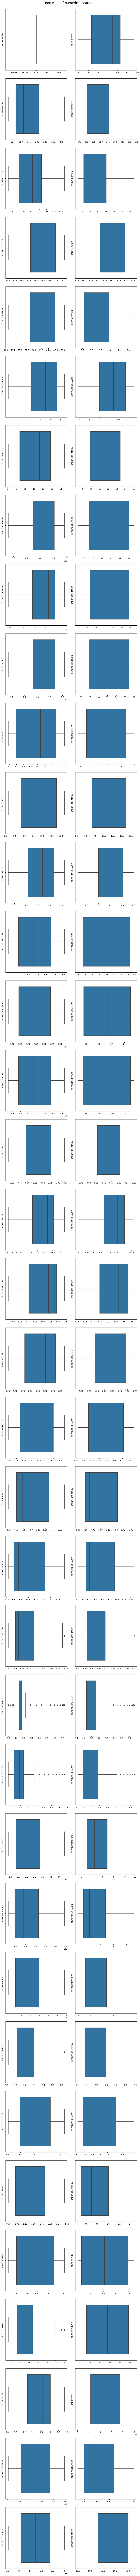

In [53]:
# Finds the number of numeric columns
num_subplots = len(numeric_columns)

# Finds the number of rows and columns needed to plot the list
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # To round up

# Create the figure and axes grid with correct dimensions
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 5))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Plot the boxplots
for i in range(num_subplots):
    column = numeric_columns[i]
    sns.boxplot(x=world_df_filtered[column], ax=axs[i])
    axs[i].set_ylabel(column)
    axs[i].set(xlabel="")

# Remove any unused axes
for i in range(num_subplots, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.5, top=0.97)

fig.suptitle("Box Plots of Numerical Features", fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Save the plot
plt.savefig('box_whisker_numerical.png')

plt.show()

The box plots show that not many of the remaining indicators have outliers. This is good for modeling as it reduces the need to handle them. 

In [54]:
# Ensure the Year column is in the right format using .loc
world_df_filtered.loc[:, 'Year'] = pd.to_datetime(world_df_filtered['Year'], format='%Y').dt.year

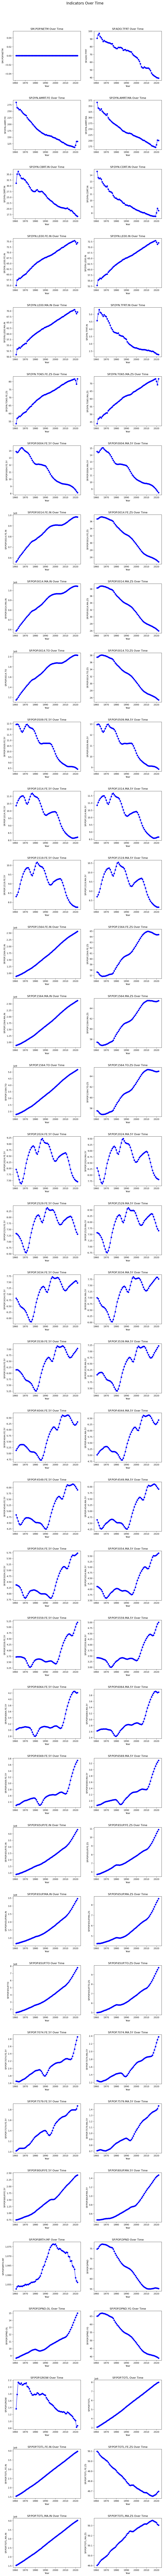

In [55]:
# Set up a plot with subplots for each numeric indicator
num_subplots = len(numeric_columns)
num_rows = (num_subplots + 1) // 2
num_cols = 2  # Fixed number of columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 5))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Iterate over each numeric column and plot its value over time
for i, column in enumerate(numeric_columns):
    if i < len(axs):  # Ensure we don't go out of bounds
        axs[i].plot(world_df_filtered['Year'], world_df_filtered[column], marker='o', linestyle='-', color='b')
        axs[i].set_title(f'{column} Over Time')
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(column)

# Remove extra axes if there's an odd number of subplots
if num_subplots % 2 != 0:
    fig.delaxes(axs[-1])

# Adjust layout to add space between subplots
plt.subplots_adjust(hspace=0.4, top=.97)

# Add a title for the entire figure
fig.suptitle("Indicators Over Time", fontsize=16)

# Save the plot to the current directory
plt.savefig('scatterplots.png')

# Show the plot
plt.show()

Data related to the genders appears to follow similar trends over time. The axes are different, however, so the values themselves are not exactly the same. There is a mix of behavior amongst the variables with most showing iteresting fluctations starting around the year 2020.

## Dimensionality Reduction

### Variance

Indicators with high variance may be more predictive over time. Variance for each variable will be tested to determine if any stand out as possible candidates for model building.

In [56]:
# Select only numeric columns (indicators)
numeric_columns = world_df_filtered.select_dtypes(include=['number'])

# Calculate variance for each indicator
indicator_variances = numeric_columns.var()

# Create a DataFrame to display the variance values for each indicator
variance_df = pd.DataFrame(indicator_variances, columns=['Variance'])

# Sort the variance values in descending order to identify indicators with higher variance
variance_df_sorted = variance_df.sort_values(by='Variance', ascending=False)

# Display the sorted variance values
print(variance_df_sorted)

                   Variance    
SP.POP.TOTL        2.242349e+18
SP.POP.1564.TO     1.175209e+18
SP.POP.TOTL.MA.IN  5.752540e+17
SP.POP.TOTL.FE.IN  5.461113e+17
SP.POP.1564.MA.IN  3.060605e+17
SP.POP.1564.FE.IN  2.818013e+17
SP.POP.0014.TO     6.389439e+16
SP.POP.65UP.TO     3.018051e+16
SP.POP.0014.MA.IN  1.777742e+16
SP.POP.0014.FE.IN  1.427256e+16
SP.POP.65UP.FE.IN  9.062244e+15
SP.POP.65UP.MA.IN  6.175229e+15
SP.DYN.AMRT.MA     2.637918e+03
SP.DYN.AMRT.FE     2.243382e+03
SP.ADO.TFRT        2.685109e+02
SP.POP.DPND.YG     9.584479e+01
SP.POP.DPND        6.923987e+01
SP.DYN.TO65.MA.ZS  6.709017e+01
SP.DYN.TO65.FE.ZS  6.100497e+01
SP.DYN.LE00.FE.IN  3.151217e+01
SP.DYN.LE00.IN     3.043151e+01
SP.DYN.LE00.MA.IN  2.923366e+01
SP.DYN.CBRT.IN     2.855116e+01
SP.POP.0014.MA.ZS  1.903413e+01
SP.POP.0014.TO.ZS  1.866322e+01
SP.POP.0014.FE.ZS  1.833048e+01
SP.POP.1564.MA.ZS  1.053303e+01
SP.POP.1564.TO.ZS  9.793155e+00
SP.POP.1564.FE.ZS  9.086363e+00
SP.POP.0004.MA.5Y  4.015019e+00
SP.POP.0

There are multiple indicators with high variance that may prove most useful for modeling. To further invesigate possible target variables and useful predictors, correlation will also be reviewed.

In [57]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
display(correlation_matrix)

,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP.ADO.TFRT,NaN,1.000000,0.905411,0.923355,0.959660,0.888522,-0.953353,-0.954608,-0.955716,0.901031,-0.942342,-0.950408,0.958636,0.962108,-0.914038,0.977660,-0.920174,0.978997,-0.917370,0.978380,0.965736,0.966517,0.938267,0.936266,0.678662,0.667419,-0.983753,-0.949237,-0.983932,-0.955796,-0.983850,-0.953069,0.160212,0.108332,-0.399935,-0.456999,-0.680640,-0.704690,-0.748465,-0.777339,-0.831900,-0.868748,-0.896053,-0.928668,-0.873186,-0.915385,-0.821441,-0.874111,-0.801256,-0.870381,-0.860004,-0.918785,-0.987261,-0.982279,-0.985147,-0.977018,-0.986606,-0.980937,-0.945502,-0.969471,-0.980947,-0.988277,-0.986705,-0.977841,-0.553835,0.950149,-0.959453,0.967323,0.933701,-0.981569,-0.981614,0.922279,-0.981525,-0.922279
SP.DYN.AMRT.FE,NaN,0.905411,1.000000,0.997402,0.956400,0.996325,-0.989825,-0.988928,-0.987944,0.975616,-0.992985,-0.989251,0.948602,0.947643,-0.987357,0.932760,-0.988067,0.934186,-0.987835,0.933457,0.923083,0.924597,0.828721,0.832965,0.433139,0.427747,-0.945815,-0.933979,-0.946047,-0.948886,-0.945939,-0.942116,-0.201768,-0.244823,-0.680322,-0.711066,-0.758528,-0.759710,-0.701873,-0.728413,-0.709433,-0.762751,-0.709151,-0.770704,-0.627276,-0.703589,-0.571551,-0.657486,-0.587019,-0.682028,-0.660751,-0.737778,-0.888412,-0.873815,-0.866907,-0.832385,-0.878956,-0.854948,-0.835931,-0.836775,-0.942238,-0.885024,-0.916641,-0.843243,-0.751565,0.946210,-0.811470,0.945429,0.837174,-0.953529,-0.953481,0.991267,-0.953575,-0.991267
SP.DYN.AMRT.MA,NaN,0.923355,0.997402,1.000000,0.963161,0.993256,-0.994368,-0.994153,-0.993785,0.972248,-0.995483,-0.993965,0.955329,0.954893,-0.988139,0.943908,-0.989404,0.945344,-0.988909,0.944617,0.932021,0.933392,0.850167,0.853879,0.476096,0.470506,-0.958262,-0.940314,-0.958507,-0.954348,-0.958393,-0.948004,-0.153158,-0.197257,-0.647562,-0.682678,-0.749385,-0.753849,-0.712801,-0.740308,-0.731597,-0.783277,-0.741973,-0.800239,-0.662265,-0.733924,-0.602140,-0.685119,-0.629682,-0.720393,-0.697677,-0.771865,-0.908716,-0.895051,-0.889719,-0.858251,-0.900401,-0.878433,-0.851855,-0.857460,-0.952740,-0.903621,-0.933274,-0.868035,-0.735062,0.951130,-0.838535,0.953299,0.851429,-0.965215,-0.965164,0.991362,-0.965262,-0.991362
SP.DYN.CBRT.IN,NaN,0.959660,0.956400,0.963161,1.000000,0.949169,-0.976217,-0.977038,-0.977700,0.981369,-0.973392,-0.976286,0.985126,0.985466,-0.972962,0.967737,-0.976498,0.968303,-0.974929,0.968030,0.944374,0.944386,0.876067,0.876366,0.574958,0.5

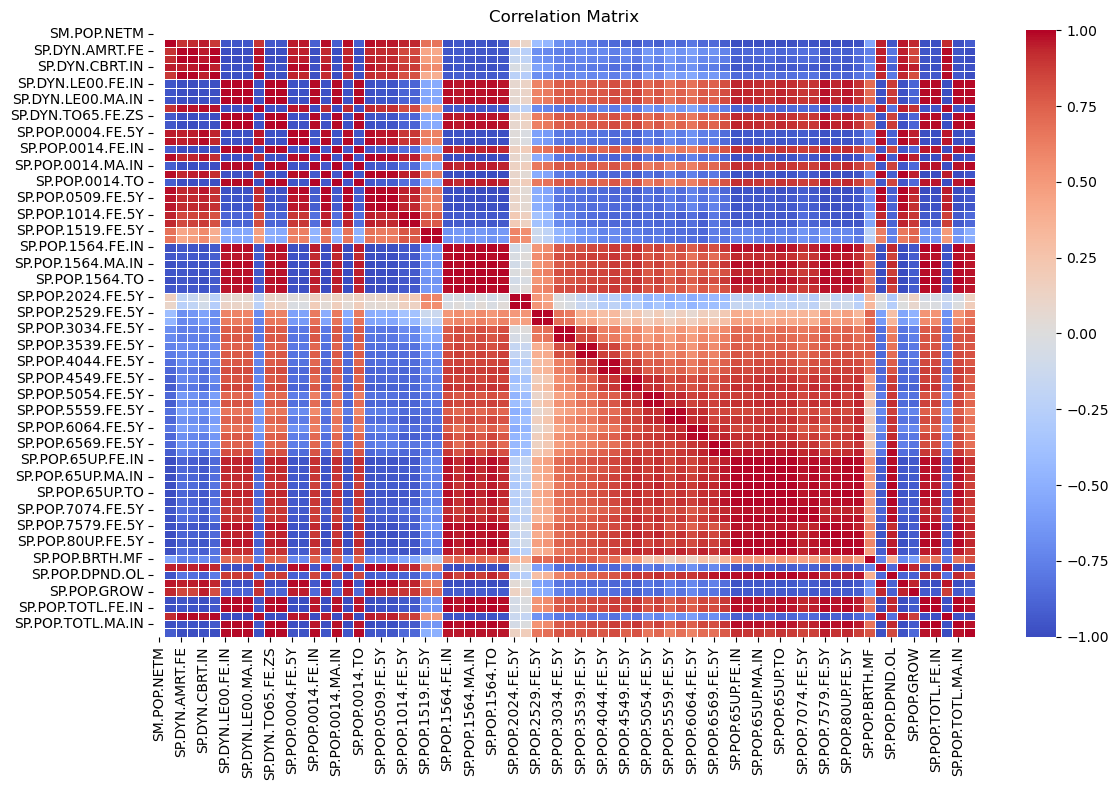

In [58]:
# Create a heatmap to visualize the correlation matrix without displaying the correlation values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')

# Adjust layout to prevent cutoff
plt.tight_layout()

# Save the plot to the current directory
plt.savefig('correlation_heatmap.png')

plt.show()

The data shows many strong correlations between variables. It is possible that some of these are due to multicolinearity. That will need to be considered as data cleaning proceeds.

After evaluating the data, the life expectancy of female babies (SP.DYN.LE00.FE.IN) will be used as the target variable. There are many factors, including childbirth, that may shorten a woman's lifespan. An increasing life expectancy at birth can be seen as a sign of progress.

## Exploring the Target Variable

### Stationarity

Stationarity checks whether the variable's statistical characteristics change over time. If they do not, they are easier to predict as characteristics such as mean, variance and autocorrelation are less likely to change over time.

In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
# Runs adfuller on the loss data series
result = adfuller(world_df_filtered['SP.DYN.LE00.FE.IN'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")

ADF Statistic: -3.3126022576296115
p-value: 0.014324465705779778
Critical Values:
   1%: -3.548493559596539
   5%: -2.912836594776334
   10%: -2.594129155766944
Data is stationary


In [61]:
# Check the correlation of each feature with the target variable
display(correlation_matrix['SP.DYN.LE00.FE.IN'].sort_values(ascending=False))

SP.DYN.LE00.FE.IN    1.000000
SP.DYN.LE00.IN       0.999923
SP.DYN.LE00.MA.IN    0.999720
SP.DYN.TO65.MA.ZS    0.999028
SP.DYN.TO65.FE.ZS    0.998793
SP.POP.TOTL.MA.ZS    0.990743
SP.POP.0014.MA.IN    0.988275
SP.POP.0014.TO       0.987148
SP.POP.0014.FE.IN    0.985672
SP.POP.TOTL.MA.IN    0.985398
SP.POP.TOTL          0.985381
SP.POP.TOTL.FE.IN    0.985361
SP.POP.1564.MA.IN    0.981025
SP.POP.1564.TO       0.980924
SP.POP.1564.FE.IN    0.980807
SP.POP.7579.FE.5Y    0.975557
SP.POP.1564.MA.ZS    0.973267
SP.POP.1564.TO.ZS    0.967808
SP.POP.80UP.FE.5Y    0.961951
SP.POP.1564.FE.ZS    0.961047
SP.POP.65UP.FE.IN    0.942880
SP.POP.7579.MA.5Y    0.939461
SP.POP.65UP.TO       0.936188
SP.POP.65UP.FE.ZS    0.930706
SP.POP.65UP.MA.IN    0.927449
SP.POP.65UP.TO.ZS    0.917471
SP.POP.80UP.MA.5Y    0.908426
SP.POP.7074.MA.5Y    0.901350
SP.POP.65UP.MA.ZS    0.900852
SP.POP.7074.FE.5Y    0.892631
SP.POP.DPND.OL       0.880339
SP.POP.4549.MA.5Y    0.840872
SP.POP.4044.MA.5Y    0.818337
SP.POP.656

### VIF

There are many indicators that are very highly correlated with the target variable. The coefficients in addition to the domain knowledge of what each indicator represents indicates a concern of multicollinearity amongst the variables. VIF will help determine if it exists and where.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [63]:
# Check for NaN values
print(world_df_filtered.isna().sum())

Year                  0
Country Code          0
Region                0
IncomeGroup          62
SM.POP.NETM           0
SP.ADO.TFRT           0
SP.DYN.AMRT.FE        0
SP.DYN.AMRT.MA        0
SP.DYN.CBRT.IN        0
SP.DYN.CDRT.IN        0
SP.DYN.LE00.FE.IN     0
SP.DYN.LE00.IN        0
SP.DYN.LE00.MA.IN     0
SP.DYN.TFRT.IN        0
SP.DYN.TO65.FE.ZS     0
SP.DYN.TO65.MA.ZS     0
SP.POP.0004.FE.5Y     0
SP.POP.0004.MA.5Y     0
SP.POP.0014.FE.IN     0
SP.POP.0014.FE.ZS     0
SP.POP.0014.MA.IN     0
SP.POP.0014.MA.ZS     0
SP.POP.0014.TO        0
SP.POP.0014.TO.ZS     0
SP.POP.0509.FE.5Y     0
SP.POP.0509.MA.5Y     0
SP.POP.1014.FE.5Y     0
SP.POP.1014.MA.5Y     0
SP.POP.1519.FE.5Y     0
SP.POP.1519.MA.5Y     0
SP.POP.1564.FE.IN     0
SP.POP.1564.FE.ZS     0
SP.POP.1564.MA.IN     0
SP.POP.1564.MA.ZS     0
SP.POP.1564.TO        0
SP.POP.1564.TO.ZS     0
SP.POP.2024.FE.5Y     0
SP.POP.2024.MA.5Y     0
SP.POP.2529.FE.5Y     0
SP.POP.2529.MA.5Y     0
SP.POP.3034.FE.5Y     0
SP.POP.3034.MA.5

In [64]:
# Check for constant columns (columns with the same value for all rows)
constant_columns = [col for col in world_df_filtered.columns if world_df_filtered[col].nunique() == 1]
print(constant_columns)

['Country Code', 'Region', 'SM.POP.NETM']


In [65]:
world_df_feature_sel = world_df_filtered.copy()
world_df_feature_sel.drop(columns=constant_columns, inplace=True)

In [66]:
# Select only numeric columns (indicators)
numeric_columns = world_df_feature_sel.select_dtypes(include=[np.number])

In [67]:
X = add_constant(numeric_columns)  # Adding a constant to the features

In [68]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

C:\Users\megme\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [69]:
print(vif_data)

   Feature             VIF         
0               const  0.000000e+00
1         SP.ADO.TFRT  4.173951e+04
2      SP.DYN.AMRT.FE  7.877635e+06
3      SP.DYN.AMRT.MA  1.330759e+06
4      SP.DYN.CBRT.IN  8.280623e+04
5      SP.DYN.CDRT.IN  3.368843e+05
6   SP.DYN.LE00.FE.IN  1.576533e+08
7      SP.DYN.LE00.IN  1.910152e+08
8   SP.DYN.LE00.MA.IN  2.122835e+08
9      SP.DYN.TFRT.IN  3.385340e+04
10  SP.DYN.TO65.FE.ZS  4.535581e+05
11  SP.DYN.TO65.MA.ZS  1.488668e+06
12  SP.POP.0004.FE.5Y  2.826147e+09
13  SP.POP.0004.MA.5Y  4.399688e+09
14  SP.POP.0014.FE.IN  2.677038e+09
15  SP.POP.0014.FE.ZS  1.196640e+09
16  SP.POP.0014.MA.IN  8.420304e+11
17  SP.POP.0014.MA.ZS  6.625279e+10
18     SP.POP.0014.TO  5.551946e+10
19  SP.POP.0014.TO.ZS  1.035710e+09
20  SP.POP.0509.FE.5Y  4.228434e+10
21  SP.POP.0509.MA.5Y  2.346438e+10
22  SP.POP.1014.FE.5Y  1.234807e+09
23  SP.POP.1014.MA.5Y  5.631567e+08
24  SP.POP.1519.FE.5Y  3.531041e+08
25  SP.POP.1519.MA.5Y  5.382976e+09
26  SP.POP.1564.FE.IN  1.811

The VIF values are very high, indicating high multicollinearity between the variables. This makes sense as multiple variables are components of others. PCA will be used to reduce multicollinearity. A scree plot will be used to determine the optimal number of components.

# Feature Selection

## PCA

PCA transforms variables into uncorrelated components. It thereby reduces multicollinearity while retaining variance in the dataset. Before it can be performed, the optimal number of components needed to retain 95% variance will be determined and the variable units will be standardized.

In [70]:
display(world_df_feature_sel.head())

,Year,IncomeGroup,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
16577,1961,NaN,90.736682,284.049655,366.140461,31.122660,14.569443,54.988259,52.871485,50.944672,4.568920,53.596493,43.876407,13.879847,14.502550,562248337.0,36.643307,585346725.0,38.298322,1.147595e+09,37.469195,12.409424,12.953586,10.354036,10.842185,8.313347,8.701856,884559044.0,57.649204,877795748.0,57.432804,1.762355e+09,57.541216,7.955572,8.293385,7.332214,7.565452,6.827453,6.996010,6.144686,6.048568,5.128409,5.017962,4.837090,4.637011,4.376883,4.126971,3.718981,3.422463,3.014570,2.623127,2.290030,1.854924,87574689.0,5.707489,65244940.0,4.268874,152819627.0,4.989590,1.652508,1.245408,1.017008,0.708630,0.747944,0.459912,1.052599,74.757472,8.671332,65.117141,1.364880,3.062769e+09,1.534382e+09,50.097864,1.528387e+09,49.902136
16578,1962,NaN,95.043985,264.172684,341.994341,35.074813,13.600995,57.406612,55.239243,53.258956,5.028700,56.915086,46.850518,13.745039,14.364384,573677312.0,36.740937,597330520.0,38.389805,1.171008e+09,37.563930,12.438979,12.988224,10.556919,11.037197,8.408462,8.797655,898075383.0,57.516883,892093297.0,57.333899,1.790169e+09,57.425551,7.838992,8.164217,7.307514,7.550602,6.771509,6.955929,6.148002,6.092626,5.203204,5.076349,4.714805,4.528582,4.362588,4.101412,3.727869,3.425325,3.033939,2.641201,2.308769,1.866596,89659076.0,5.742180,66537512.0,4.276296,156196594.0,5.010520,1.648219,1.235608,1.029274,0.713672,0.755918,0.460421,1.053732,75.167961,8.725245,65.413268,1.782818,3.117373e+09,1.561412e+09,50.087421,1.555961e+09,49.912579
16579,1963,NaN,97.213031,261.059786,338.199236,36.251294,13.444486,57.751863,55.571979,53.578000,5.317398,57.457964,47.412277,13.849054,14.472516,589370283.0,36.966519,613821915.0,38.611764,1.203192e+09,37.787951,12.396219,12.947120,10.721246,11.192128,8.548852,8.936768,912988630.0,57.264529,907902786.0,57.110584,1.820891e+09,57.187668,7.681326,7.987683,7.259524,7.513634,6.681819,6.869937,6.130799,6.128010,5.274994,5.131659,4.573226,4.402830,4.338033,4.068856,3.725068,3.415413,3.050888,2.655796,2.319529,1.873307,91976433.0,5.768952,68003021.0,4.277652,159979459.0,5.024381,1.639607,1.224470,1.045409,0.719493,0.764406,0.460381,1.054211,75.982832,8.785777,66.077098,2.139300,3.184063e+09,1.594335e+09,50.072354,1.589728e+09,49.927646
16580,1964,NaN,93.086606,255.871747,332.119183,35.106656,13.515490,58.259616,56.064844,54.052438,5.134354,58.166158,48.086952,14.056927,14.688289,604565406.0,37.146764,629820070.0,38.788036,1.234385e+09,37.966452,12.249913,12.796310,10.839923,11.303437,8.738535,9.125106,928544578.0,57.053257,924362328.0,56.927686,1.852907e+09,56.990544,7.534782,7.828268,7.201105,7.457004,6.588147,6.780129,6.096385,6.143395,5.334756,5.185903,4.459213,4.299410,4.306992,4.032902,3.724797,3.404989,3.068545,2.670581,2.326169,1.

In [71]:
world_df_feature_sel = world_df_feature_sel.drop("IncomeGroup", axis = 1)

In [72]:
display(world_df_feature_sel.head())

,Year,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.IN,SP.POP.0014.FE.ZS,SP.POP.0014.MA.IN,SP.POP.0014.MA.ZS,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,SP.POP.1014.MA.5Y,SP.POP.1519.FE.5Y,SP.POP.1519.MA.5Y,SP.POP.1564.FE.IN,SP.POP.1564.FE.ZS,SP.POP.1564.MA.IN,SP.POP.1564.MA.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.2024.FE.5Y,SP.POP.2024.MA.5Y,SP.POP.2529.FE.5Y,SP.POP.2529.MA.5Y,SP.POP.3034.FE.5Y,SP.POP.3034.MA.5Y,SP.POP.3539.FE.5Y,SP.POP.3539.MA.5Y,SP.POP.4044.FE.5Y,SP.POP.4044.MA.5Y,SP.POP.4549.FE.5Y,SP.POP.4549.MA.5Y,SP.POP.5054.FE.5Y,SP.POP.5054.MA.5Y,SP.POP.5559.FE.5Y,SP.POP.5559.MA.5Y,SP.POP.6064.FE.5Y,SP.POP.6064.MA.5Y,SP.POP.6569.FE.5Y,SP.POP.6569.MA.5Y,SP.POP.65UP.FE.IN,SP.POP.65UP.FE.ZS,SP.POP.65UP.MA.IN,SP.POP.65UP.MA.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.7074.FE.5Y,SP.POP.7074.MA.5Y,SP.POP.7579.FE.5Y,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
16577,1961,90.736682,284.049655,366.140461,31.122660,14.569443,54.988259,52.871485,50.944672,4.568920,53.596493,43.876407,13.879847,14.502550,562248337.0,36.643307,585346725.0,38.298322,1.147595e+09,37.469195,12.409424,12.953586,10.354036,10.842185,8.313347,8.701856,884559044.0,57.649204,877795748.0,57.432804,1.762355e+09,57.541216,7.955572,8.293385,7.332214,7.565452,6.827453,6.996010,6.144686,6.048568,5.128409,5.017962,4.837090,4.637011,4.376883,4.126971,3.718981,3.422463,3.014570,2.623127,2.290030,1.854924,87574689.0,5.707489,65244940.0,4.268874,152819627.0,4.989590,1.652508,1.245408,1.017008,0.708630,0.747944,0.459912,1.052599,74.757472,8.671332,65.117141,1.364880,3.062769e+09,1.534382e+09,50.097864,1.528387e+09,49.902136
16578,1962,95.043985,264.172684,341.994341,35.074813,13.600995,57.406612,55.239243,53.258956,5.028700,56.915086,46.850518,13.745039,14.364384,573677312.0,36.740937,597330520.0,38.389805,1.171008e+09,37.563930,12.438979,12.988224,10.556919,11.037197,8.408462,8.797655,898075383.0,57.516883,892093297.0,57.333899,1.790169e+09,57.425551,7.838992,8.164217,7.307514,7.550602,6.771509,6.955929,6.148002,6.092626,5.203204,5.076349,4.714805,4.528582,4.362588,4.101412,3.727869,3.425325,3.033939,2.641201,2.308769,1.866596,89659076.0,5.742180,66537512.0,4.276296,156196594.0,5.010520,1.648219,1.235608,1.029274,0.713672,0.755918,0.460421,1.053732,75.167961,8.725245,65.413268,1.782818,3.117373e+09,1.561412e+09,50.087421,1.555961e+09,49.912579
16579,1963,97.213031,261.059786,338.199236,36.251294,13.444486,57.751863,55.571979,53.578000,5.317398,57.457964,47.412277,13.849054,14.472516,589370283.0,36.966519,613821915.0,38.611764,1.203192e+09,37.787951,12.396219,12.947120,10.721246,11.192128,8.548852,8.936768,912988630.0,57.264529,907902786.0,57.110584,1.820891e+09,57.187668,7.681326,7.987683,7.259524,7.513634,6.681819,6.869937,6.130799,6.128010,5.274994,5.131659,4.573226,4.402830,4.338033,4.068856,3.725068,3.415413,3.050888,2.655796,2.319529,1.873307,91976433.0,5.768952,68003021.0,4.277652,159979459.0,5.024381,1.639607,1.224470,1.045409,0.719493,0.764406,0.460381,1.054211,75.982832,8.785777,66.077098,2.139300,3.184063e+09,1.594335e+09,50.072354,1.589728e+09,49.927646
16580,1964,93.086606,255.871747,332.119183,35.106656,13.515490,58.259616,56.064844,54.052438,5.134354,58.166158,48.086952,14.056927,14.688289,604565406.0,37.146764,629820070.0,38.788036,1.234385e+09,37.966452,12.249913,12.796310,10.839923,11.303437,8.738535,9.125106,928544578.0,57.053257,924362328.0,56.927686,1.852907e+09,56.990544,7.534782,7.828268,7.201105,7.457004,6.588147,6.780129,6.096385,6.143395,5.334756,5.185903,4.459213,4.299410,4.306992,4.032902,3.724797,3.404989,3.068545,2.670581,2.326169,1.879943,94394954.0,5.799980,6

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [74]:
# Drop the target column from the numeric columns data frame
X = world_df_feature_sel.drop(columns=['SP.DYN.LE00.FE.IN', 'Year'])  # Features (excluding target variable)
y = world_df_feature_sel['SP.DYN.LE00.FE.IN']  # Target variable
time = world_df_feature_sel['Year'] # Time column

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()  # Keep all components
pca.fit(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

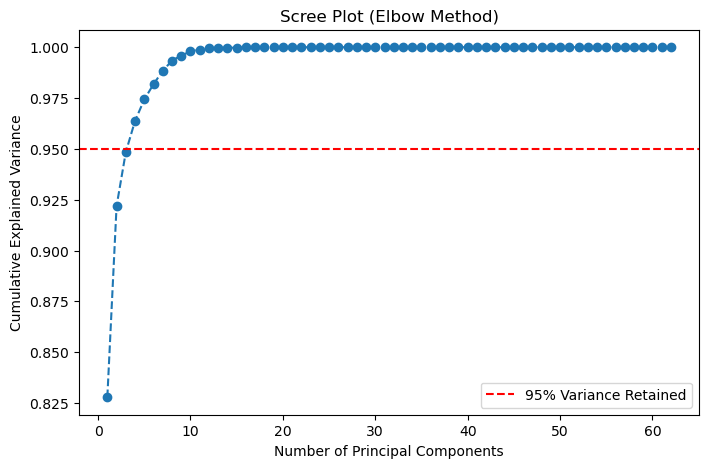

In [75]:
# Plot the scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Elbow Method)")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Retained")
plt.legend()
plt.show()

In [76]:
# Find the number of components needed for 95% variance
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Optimal Number of Components: {num_components}")

Optimal Number of Components: 4


In [77]:
# Create PCA loadings DataFrame (transpose components)
loadings = pd.DataFrame(
    pca.components_[:num_components, :].T,  # Only keep top components
    index=X.columns,  # Correct index (column names)
    columns=[f'PC{i+1}' for i in range(num_components)]
)

print(loadings)

                   PC1       PC2       PC3       PC4     
SP.ADO.TFRT       -0.127600 -0.025988  0.076841 -0.072542
SP.DYN.AMRT.FE    -0.120193  0.129788  0.089536 -0.015048
SP.DYN.AMRT.MA    -0.122109  0.109458  0.089524 -0.020001
SP.DYN.CBRT.IN    -0.125687  0.061971  0.054884 -0.042759
SP.DYN.CDRT.IN    -0.117882  0.143392  0.083983 -0.058281
SP.DYN.LE00.IN     0.125768 -0.077519 -0.072049  0.024727
SP.DYN.LE00.MA.IN  0.125934 -0.075707 -0.068368  0.027827
SP.DYN.TFRT.IN    -0.120569  0.128481  0.042075  0.016627
SP.DYN.TO65.FE.ZS  0.124584 -0.092748 -0.069673  0.023589
SP.DYN.TO65.MA.ZS  0.125502 -0.082317 -0.064994  0.026190
SP.POP.0004.FE.5Y -0.127138  0.051483 -0.004451 -0.015061
SP.POP.0004.MA.5Y -0.127327  0.047080  0.006024 -0.010958
SP.POP.0014.FE.IN  0.121555 -0.111611 -0.081569 -0.008973
SP.POP.0014.FE.ZS -0.129031  0.016182 -0.027076 -0.027852
SP.POP.0014.MA.IN  0.122414 -0.108133 -0.067271  0.002925
SP.POP.0014.MA.ZS -0.129115  0.015513 -0.018242 -0.018733
SP.POP.0014.TO

4 principal components are need to retain 95% of the variation in the dataset, however, there are no stand out variables that show high correlation. These principal components will be used to continue with model building.

In [78]:
# Transform the data with the optimal number of components
X_pca = pca.transform(data_scaled)[:, :num_components]  # PCA components

In [79]:
print(time)

16577    1961
16578    1962
16579    1963
16580    1964
16581    1965
16582    1966
16583    1967
16584    1968
16585    1969
16586    1970
16587    1971
16588    1972
16589    1973
16590    1974
16591    1975
16592    1976
16593    1977
16594    1978
16595    1979
16596    1980
16597    1981
16598    1982
16599    1983
16600    1984
16601    1985
16602    1986
16603    1987
16604    1988
16605    1989
16606    1990
16607    1991
16608    1992
16609    1993
16610    1994
16611    1995
16612    1996
16613    1997
16614    1998
16615    1999
16616    2000
16617    2001
16618    2002
16619    2003
16620    2004
16621    2005
16622    2006
16623    2007
16624    2008
16625    2009
16626    2010
16627    2011
16628    2012
16629    2013
16630    2014
16631    2015
16632    2016
16633    2017
16634    2018
16635    2019
16636    2020
16637    2021
16638    2022
Name: Year, dtype: object


In [80]:
# Convert the time series (years) to a DataFrame, making sure to use proper indexing
time_df = pd.DataFrame(time.values, columns=['Year'], index=range(len(time)))

# Convert the PCA components into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PCA_Component_{i+1}' for i in range(X_pca.shape[1])], index=range(len(X_pca)))

# Concatenate the PCA DataFrame with the time DataFrame
X_pca_with_time_df = pd.concat([pca_df, time_df], axis=1)

In [81]:
print(pca_df)
print(time_df)

    PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4
0   -9.991583        3.729343         2.562808        -1.488604       
1   -9.941287        3.546074         2.383075        -1.322678       
2  -10.167555        3.644363         2.281225        -1.140873       
3  -10.079007        3.676005         2.051446        -0.895356       
4  -10.077877        3.746914         1.857918        -0.585171       
5   -9.914377        3.603819         1.530839        -0.211673       
6   -9.739234        3.394691         1.166345         0.188528       
7   -9.666416        3.157838         0.770388         0.627907       
8   -9.554027        2.876932         0.307750         1.034011       
9   -9.407567        2.544778        -0.156405         1.427795       
10  -9.273711        2.252612        -0.551752         1.661290       
11  -8.866109        1.737604        -0.978037         1.756700       
12  -8.547627        1.242170        -1.377896         1.727824       
13  -8

In [82]:
display(X_pca_with_time_df.head())

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,Year
0,-9.991583,3.729343,2.562808,-1.488604,1961
1,-9.941287,3.546074,2.383075,-1.322678,1962
2,-10.167555,3.644363,2.281225,-1.140873,1963
3,-10.079007,3.676005,2.051446,-0.895356,1964
4,-10.077877,3.746914,1.857918,-0.585171,1965


In [83]:
# Compute the correlation matrix
corr_matrix = np.corrcoef(X_pca.T)  # Transpose to get correlation between components

# Convert the correlation matrix to a DataFrame for easier readability
corr_df = pd.DataFrame(corr_matrix, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], 
                       index=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Print the correlation matrix 
print(corr_df)

     PC1           PC2           PC3           PC4         
PC1  1.000000e+00  5.185604e-15 -9.600800e-16 -2.179533e-17
PC2  5.185604e-15  1.000000e+00 -2.605771e-17 -1.759552e-16
PC3 -9.600800e-16 -2.605771e-17  1.000000e+00 -1.066129e-17
PC4 -2.179533e-17 -1.759552e-16 -1.066129e-17  1.000000e+00


Review of the correlation coefficients between the components shows that there is essentially zero. The issue of multicollinearity has been handled.

# Modeling

## Building a Baseline Model

An ARIMA model will be built using only the target variable, SP.DYN.LE00.FE.IN, as its own predictor. Results will be evaluated using 

### Model Parameters: ACF and PACF

ARIMA models take the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) values as parameters. The ACF shows correlation the time series with its lagged values while PACF shows the same but without the effects of intermediate lags. Both of these can be read via their respective plots.

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\megme\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


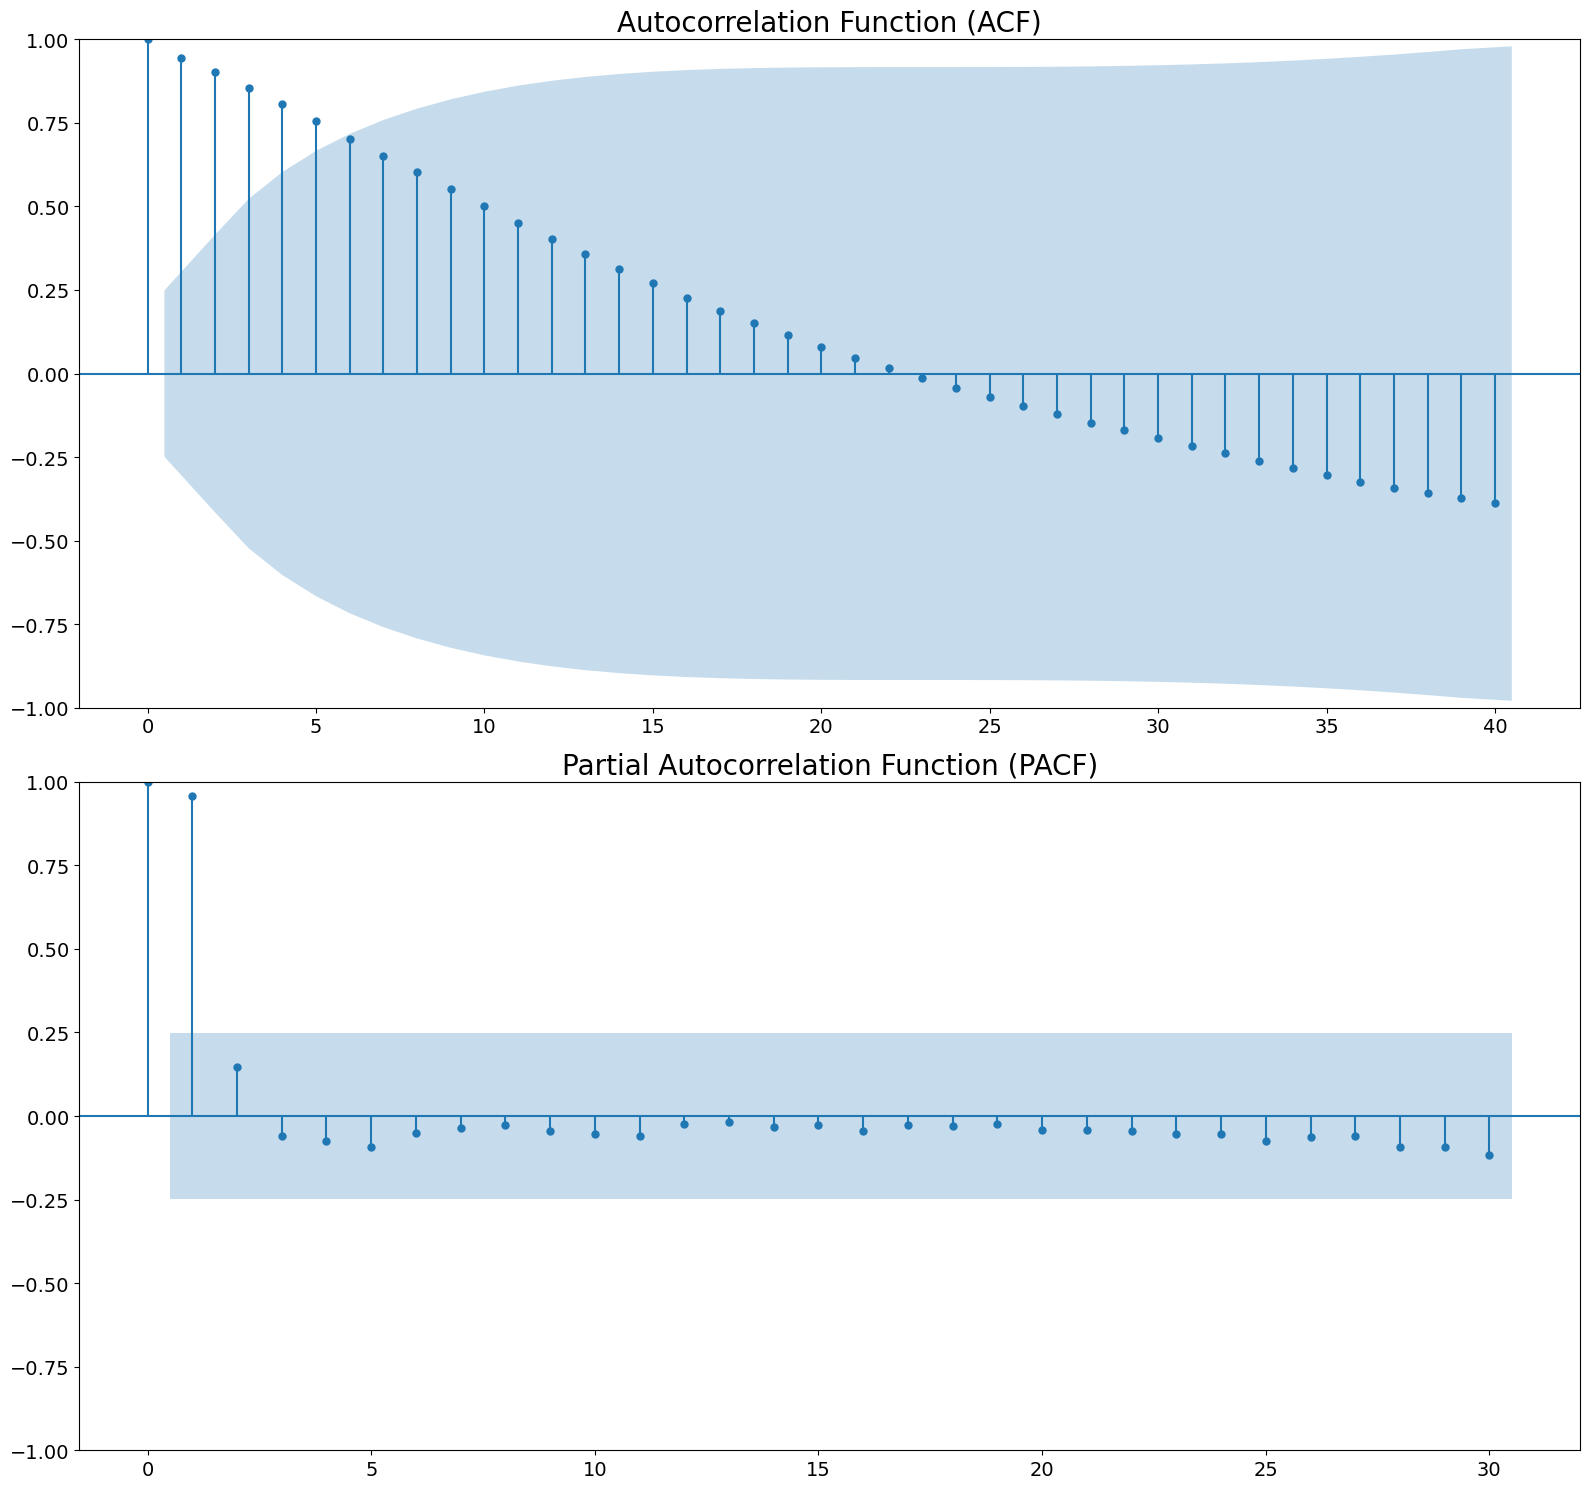

In [85]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 15))

# Plot ACF with customized font size
plot_acf(y, ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=20)  # Title font size
axes[0].tick_params(axis='both', labelsize=14)  # Ticks font size

# Plot PACF with customized font size
plot_pacf(y, ax=axes[1], lags=30)
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=20)  # Title font size
axes[1].tick_params(axis='both', labelsize=14)  # Ticks font size

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

The ACF plot indicates no significant correlation after the 6th lag while the PACF plot indicates no significant correlation after the 2nd lag. 

The MA value of 6 and AR of 2 will be tried first.

### Building the Model

In [86]:
baseline_df = world_df_feature_sel[['SP.DYN.LE00.FE.IN', 'Year']].copy()

In [87]:
# Check the data type of the 'Year' column before conversion
print("Data type of 'Year' before conversion:", baseline_df['Year'].dtype)

# Check the first few values of 'Year' before conversion
print("\nFirst few values in 'Year' column:")
print(baseline_df['Year'].head())

# Check unique types in the 'Year' column
print("\nUnique data types in 'Year' column:")
print(baseline_df['Year'].apply(type).unique())

Data type of 'Year' before conversion: object

First few values in 'Year' column:
16577    1961
16578    1962
16579    1963
16580    1964
16581    1965
Name: Year, dtype: object

Unique data types in 'Year' column:
[<class 'int'>]


In [88]:
# Check for missing values (NaN) in the 'SP.DYN.LE00.FE.IN' column
missing_values = baseline_df['SP.DYN.LE00.FE.IN'].isna().sum()

# List the years (index of the DataFrame)
year_list = baseline_df['Year'].tolist()

# Print missing values and the years list
print(f"Number of missing values in 'SP.DYN.LE00.FE.IN': {missing_values}")
print("\nList of years:")
print(year_list)

Number of missing values in 'SP.DYN.LE00.FE.IN': 0

List of years:
[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [89]:
baseline_df['Year'] = baseline_df['Year'].astype(str)  # Convert integers to strings
baseline_df['Year'] = pd.to_datetime(baseline_df['Year'], format='%Y', errors='coerce')

In [90]:
# Ensure 'Year' is the index
baseline_df.set_index('Year', inplace=True)


print(baseline_df.head())

            SP.DYN.LE00.FE.IN
Year                         
1961-01-01  54.988259        
1962-01-01  57.406612        
1963-01-01  57.751863        
1964-01-01  58.259616        
1965-01-01  58.192115        


In [91]:
# List the years (index of the DataFrame)
year_list = baseline_df.index.tolist()
print(year_list)

[Timestamp('1961-01-01 00:00:00'), Timestamp('1962-01-01 00:00:00'), Timestamp('1963-01-01 00:00:00'), Timestamp('1964-01-01 00:00:00'), Timestamp('1965-01-01 00:00:00'), Timestamp('1966-01-01 00:00:00'), Timestamp('1967-01-01 00:00:00'), Timestamp('1968-01-01 00:00:00'), Timestamp('1969-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1971-01-01 00:00:00'), Timestamp('1972-01-01 00:00:00'), Timestamp('1973-01-01 00:00:00'), Timestamp('1974-01-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1976-01-01 00:00:00'), Timestamp('1977-01-01 00:00:00'), Timestamp('1978-01-01 00:00:00'), Timestamp('1979-01-01 00:00:00'), Timestamp('1980-01-01 00:00:00'), Timestamp('1981-01-01 00:00:00'), Timestamp('1982-01-01 00:00:00'), Timestamp('1983-01-01 00:00:00'), Timestamp('1984-01-01 00:00:00'), Timestamp('1985-01-01 00:00:00'), Timestamp('1986-01-01 00:00:00'), Timestamp('1987-01-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('19

In [92]:
baseline_df.index = baseline_df.index.to_period('Y')

print(baseline_df.head())
print(baseline_df.info())

# List the years (index of the DataFrame)
year_list = baseline_df.index.tolist()
print(year_list)

      SP.DYN.LE00.FE.IN
Year                   
1961  54.988259        
1962  57.406612        
1963  57.751863        
1964  58.259616        
1965  58.192115        
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 62 entries, 1961 to 2022
Freq: Y-DEC
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.DYN.LE00.FE.IN  62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes
None
[Period('1961', 'Y-DEC'), Period('1962', 'Y-DEC'), Period('1963', 'Y-DEC'), Period('1964', 'Y-DEC'), Period('1965', 'Y-DEC'), Period('1966', 'Y-DEC'), Period('1967', 'Y-DEC'), Period('1968', 'Y-DEC'), Period('1969', 'Y-DEC'), Period('1970', 'Y-DEC'), Period('1971', 'Y-DEC'), Period('1972', 'Y-DEC'), Period('1973', 'Y-DEC'), Period('1974', 'Y-DEC'), Period('1975', 'Y-DEC'), Period('1976', 'Y-DEC'), Period('1977', 'Y-DEC'), Period('1978', 'Y-DEC'), Period('1979', 'Y-DEC'), Period('1980', 'Y-DEC'), Period('1981', 'Y

In [93]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [94]:
# Split data into train and test
train_size = int(len(baseline_df) * 0.8)
train, test = baseline_df[:train_size], baseline_df[train_size:]

# Fit ARIMA model on training data
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

The MA and AR values were both reverted to 1 to fix issues with how the model was (not) running. This is okay and better values won't be sought out as this is the baseline model.

C:\Users\megme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


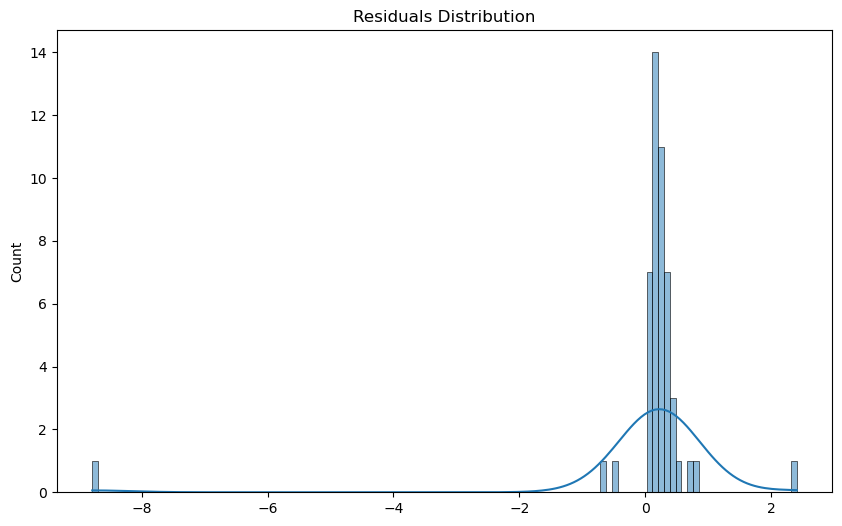

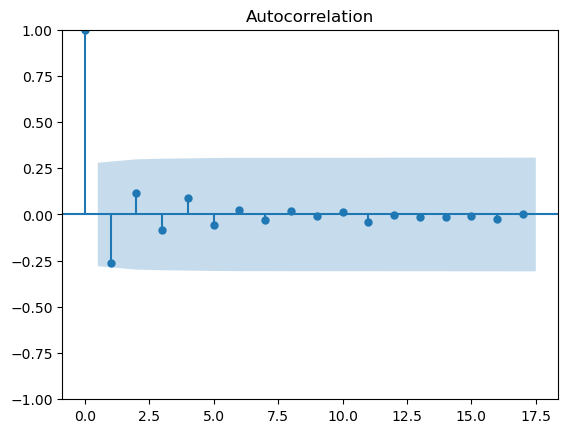

In [95]:
# Extract residuals
residuals = model_fit.resid

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Plot Autocorrelation Function (ACF) of residuals
plot_acf(residuals)
plt.show()

The histogram with KDE indicates the data is left-skewed. This may mean that the model isn't completely capturing the underlying data. The residuals are centered just to the right of 0, indicating there may be some bias in the model.

The ACF chart shows an autocorrelation at lag one. A stronger value of AR might help.

In [96]:
# Summary statistics of the residuals
print(residuals.describe())

count    49.000000
mean      0.072487
std       1.346723
min      -8.784098
25%       0.140142
50%       0.208451
75%       0.308179
max       2.406545
dtype: float64


The mean is close to zero, suggesting the model is unbiased. The standard deviation, however, is quite large and the min and max widespread. The model is likely not capturing all of the data's structure. 

In [97]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test for autocorrelation in residuals
ljung_box_test = acorr_ljungbox(residuals, lags=[1], return_df=True)
print(ljung_box_test)

   lb_stat   lb_pvalue
1  3.543526  0.059778 


After reviewing the autocorrelation on the ACF chart, it appears there might stil be some issues at lag one. This test shows that the p-value is on the threshold of significance for autocorrelation at that lag. Technically it is not statistically significant, but it is close.

In [98]:
# Predict on test data
forecast = model_fit.forecast(steps=len(test))

# Flatten forecast and test values to ensure they are 1D
forecast = forecast.to_numpy().flatten()
test_values = test.values.flatten()

# Create a DataFrame for better comparison (with indices and actual vs forecasted values)
comparison_df = pd.DataFrame({
    'Actual': test_values,
    'Forecasted': forecast
}, index=test.index)  # Use the index of the test set (for time series)

# Calculate Residuals (Forecast - Actual)
comparison_df['Residuals'] = comparison_df['Forecasted'] - comparison_df['Actual']

# Print comparison DataFrame
print(comparison_df)


      Actual     Forecasted  Residuals
Year                                  
2010  73.134926  73.047736  -0.087191 
2011  73.477308  73.025298  -0.452010 
2012  73.765305  73.002915  -0.762390 
2013  74.063726  72.980586  -1.083139 
2014  74.329856  72.958311  -1.371545 
2015  74.517119  72.936090  -1.581028 
2016  74.782681  72.913923  -1.868758 
2017  75.008926  72.891810  -2.117117 
2018  75.217640  72.869749  -2.347890 
2019  75.416409  72.847743  -2.568666 
2020  74.806828  72.825789  -1.981039 
2021  73.882785  72.803889  -1.078896 
2022  74.482332  72.782041  -1.700291 


In [99]:
# Calculate MAE and RMSE
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Forecasted'])
rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Forecasted']))

# Calculate R2
actual_mean = np.mean(comparison_df['Actual'])

# Calculate the total sum of squares (SST)
sst = np.sum((comparison_df['Actual'] - actual_mean) ** 2)

# Calculate the residual sum of squares (SSE)
sse = np.sum((comparison_df['Actual'] - comparison_df['Forecasted']) ** 2)

# Calculate R-squared
r2 = 1 - (sse / sst)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 1.4615354208703109
Root Mean Squared Error (RMSE): 1.6269775505861095
R-squared: -5.10419263938548


In [100]:
print(baseline_df['SP.DYN.LE00.FE.IN'].describe())

count    62.000000
mean     67.347859
std       5.613570
min      54.988259
25%      63.061443
50%      67.901194
75%      72.245217
max      75.416409
Name: SP.DYN.LE00.FE.IN, dtype: float64


The MAE value indicates that the model's predictions are off 1.46 values from the actual values on average. Considering the spread of the values, this is a decently accurate outcome. 

The RSME value is slightly higher than the MAE, indicating that there was a least one larger error. The predicted values are still within 1.63 units of the actual values on average.

The R-squared value, however, suggests that the model performs worse than guessing the average value for each year. This may mean ARIMA is not the appropriate model choice, parameters need to be adjusted or differencing needs to be done. 

## ARIMAX Model with PCA Components

An ARIMAX model will be used so the PCA components can be used to help with predictions.

In [101]:
# Convert 'Year' column to string
X_pca_with_time_df['Year'] = X_pca_with_time_df['Year'].astype(str)

display(X_pca_with_time_df.head())

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,Year
0,-9.991583,3.729343,2.562808,-1.488604,1961
1,-9.941287,3.546074,2.383075,-1.322678,1962
2,-10.167555,3.644363,2.281225,-1.140873,1963
3,-10.079007,3.676005,2.051446,-0.895356,1964
4,-10.077877,3.746914,1.857918,-0.585171,1965


In [102]:
target_df = world_df_feature_sel[['SP.DYN.LE00.FE.IN', 'Year']].copy()

# Convert 'Year' column to string
target_df['Year'] = target_df['Year'].astype(str)

display(target_df.head())

,SP.DYN.LE00.FE.IN,Year
16577,54.988259,1961
16578,57.406612,1962
16579,57.751863,1963
16580,58.259616,1964
16581,58.192115,1965


In [103]:
# Merges the two DataFrames
X_pca_with_target = pd.merge(target_df, X_pca_with_time_df, on='Year', how='left')

In [104]:
# Convert 'Year' column to datetime format
X_pca_with_target['Year'] = pd.to_datetime(X_pca_with_target['Year'], format='%Y')

# Set 'Year' as the index
X_pca_with_target.set_index('Year', inplace=True)

# Set the frequency to yearly
X_pca_with_target.index = X_pca_with_target.index.to_period('Y')

In [105]:
# Check the combined DataFrame
display(X_pca_with_target.head())

,SP.DYN.LE00.FE.IN,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4
Year,,,,,
1961,54.988259,-9.991583,3.729343,2.562808,-1.488604
1962,57.406612,-9.941287,3.546074,2.383075,-1.322678
1963,57.751863,-10.167555,3.644363,2.281225,-1.140873
1964,58.259616,-10.079007,3.676005,2.051446,-0.895356
1965,58.192115,-10.077877,3.746914,1.857918,-0.585171


### Splitting the Dataset

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# Split the data into predictors (X) and target (y)
X = X_pca_with_target.drop(columns=['SP.DYN.LE00.FE.IN'])  
y = X_pca_with_target['SP.DYN.LE00.FE.IN']

In [108]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # No shuffling for time series

### Re-checking Stationarity

In [109]:
# Check stationarity again using ADF
adf_result = adfuller(y_train)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -1.1313988641786799
p-value: 0.7023893975231629


The data is not stationary. Differencing will be used to make it stationary. This is because the data shows a strong deterministic trend as seen when plotted.

In [110]:
# Difference the target variable to make it stationary
y_train_diff = y_train.diff().dropna()

# Perform Augmented Dickey-Fuller test again on the differenced data
adf_result_diff = adfuller(y_train_diff)

print(f"ADF Statistic (differenced): {adf_result_diff[0]}")
print(f"p-value (differenced): {adf_result_diff[1]}")

ADF Statistic (differenced): -1.072826860324653
p-value (differenced): 0.7257857212364036


The data is still not stationary. Second differencing will be attempted.

In [111]:
# Perform second differencing to remove any remaining trend
y_train_diff2 = y_train_diff.diff().dropna()

# Perform Augmented Dickey-Fuller test on the second differenced data
adf_result_diff2 = adfuller(y_train_diff2)
print(f"ADF Statistic (second differenced): {adf_result_diff2[0]}")
print(f"p-value (second differenced): {adf_result_diff2[1]}")

ADF Statistic (second differenced): -5.596263436815456
p-value (second differenced): 1.2949596791901115e-06


The data is now stationary as shown by the very small p-value.

In [112]:
# Apply the same differencing to y_test
y_test_diff = y_test.diff().dropna()  

### Building the Model

In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [114]:
# Specify the model order (p, d, q), where d=2 due to second differencing
p = 1 
q = 1
d = 2  

# No seasonal trends in the data
seasonal_order = (0, 0, 0, 0)

In [115]:
# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train_diff, exogenous=X_train, order=(p, d, q), seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit(disp=False)

In [116]:
display(sarimax_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      SP.DYN.LE00.FE.IN   No. Observations:                   48
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 -11.134
Date:                Sat, 01 Feb 2025   AIC                             28.267
Time:                        16:40:37   BIC                             33.753
Sample:                    12-31-1962   HQIC                            30.322
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9583      0.025    -38.352      0.000      -1.007      -0.909
ma.L1          0.1588      0.194      0.819      0.413      -0.221       0.539
sigma2         0.0905      0.010      8.928      0.000       0.071       0.110
===================================================================================
Ljung-Box (L1) (Q):                   1.90   Jarque-Bera (JB):               105.50
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The ar.L1 results indicate that a strong negative relationship between the current and previous time steps. This means that even though the values trend upward, the previous and current values are inversely related. The p-value is significant, indicating that past values influence the present value.

The ma.L1 result shows a weak moving average effect that isn't statistically significant. It may be possible to remove the MA value of 1 to achieve better model output.

The AIC & BIC values could be lower, but would need to be compared with a different model fit to see if they improve.

The rest of the statisics show that there is no strong autocorrelation in the residuals but also that the residuals are not normally distributed. The variance of errors is also not constant.

In [117]:
# Make forecasts
forecast_steps = 13
forecast = sarimax_fit.get_forecast(steps=forecast_steps, exogenous=X_test)
forecast_values = forecast.predicted_mean

In [118]:
print(f"y_test length: {len(y_test)}")
print(f"forecast_values length: {len(forecast_values)}")

y_test length: 13
forecast_values length: 13


In [119]:
# Reintegrate the differenced forecasts to the original scale
original_scale_forecast = y_train[-1] + np.cumsum(forecast_values)

C:\Users\megme\AppData\Local\Temp\ipykernel_8096\1390644408.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_scale_forecast = y_train[-1] + np.cumsum(forecast_values)


In [120]:
# Calculate MAE, RMSE
mae = mean_absolute_error(y_test, original_scale_forecast)
rmse = np.sqrt(mean_squared_error(y_test, original_scale_forecast))
r2 = r2_score(y_test, original_scale_forecast)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")

MAE: 4.311271264811515
RMSE: 5.751419895556928
R-Squared: -75.28080380090536


The results of the model using principal components as predictors are worse than the baseline model. There are multiple issues shown via the summary statistics of the model fitting. 

This indicates that SARIMAX might not be the best model for this data. Exponential Smoothing models may work better because the target variable shows a clear upward trend over time. To use other features as predictors, XGBoost would also be a good choice.

Tuning the parameters of the model might also help. 